<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/ML%20task%20table%20PCA%20ICA%20t-SNE%20DBSCAN%20AggClustering%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, FastICA, KernelPCA


##Special def for visualisation

In [ ]:
def plot_samples(S, axis_list=None, color="steelblue"):

    colors = ['red' if label == 0 else 'blue' for label in color]
    plt.scatter(
        #S[:, 0], S[:, 1], s=2, marker="o", zorder=10, c=color#, color=color, alpha=0.5
         S[:, 0], S[:, 1], alpha=0.4, s=30, edgecolors='k', linewidth=0.5, c=colors
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            x_axis, y_axis = axis / axis.std()
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -5, 5, color="black", linewidth=0.5)
    plt.vlines(0, -3, 3, color="black", linewidth=0.5)
    plt.xlim(-5, 5)
    plt.ylim(-3, 3)
    plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")


def plot_df_samples(df, axis_list=None, color="steelblue"):

    fig = plt.figure(figsize=(7,5))

    S1 = np.array(df['Column1_feature'])
    S2 = np.array(df['Column2_feature'])
    S1 = S1/S1.std()
    S2 = S2/S2.std()
    color = np.array(df['Column3_target'])
    colors = ['red' if label == 0 else 'blue' for label in color]

    plt.scatter(
        #S[:, 0], S[:, 1], s=2, marker="o", zorder=10, c=color#, color=color, alpha=0.5
         S1, S2, alpha=0.4, s=30, edgecolors='k', linewidth=0.5, c=colors
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            x_axis, y_axis = axis / axis.std()
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    #plt.hlines(0, -5, 5, color="black", linewidth=0.5)
    #plt.vlines(0, -3, 3, color="black", linewidth=0.5)
    #plt.xlim(-5, 5)
    #plt.ylim(-3, 3)
    #plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()

## dataset#4 - t-destribution

In [ ]:
# # T-destribution


# n_samples = 10000

# rng = np.random.RandomState(42)
# X = rng.standard_t(1.5, size=(n_samples, 2))
# X[:, 0] *= 2.0

# Cb = np.ones(int(n_samples/2))
# Ca = np.zeros(int(n_samples/2))
# Cy = np.hstack((Ca,Cb))
# ## Mix data
# Rotation = np.array([[0.5, 1], [1, 1]])  # Mixing matrix

# Xmixed = np.dot(X, Rotation.T)  # Generate observations

Пусть $X_0, X_1, \ldots, X_n$ — независимые стандартные нормальные случайные величины, такие что $X_i \sim N(0, 1)$, $i = 1, \ldots, n$.

Тогда распределение случайной величины называется t-распределением с $n$ степенями свободы.
$$t = \frac{X_0}{\sqrt{\frac{1}{n}\sum_{i=1}^n X_i^2}}$$


Функция плотности вероятности t-распределения с $n$ степенями свободы имеет вид:

$$f(t) = \frac{\Gamma\left(\frac{n+1}{2}\right)}{\sqrt{n\pi}\ \Gamma\left(\frac{n}{2}\right)} \left(1 + \frac{t^2}{n}\right)^{-\frac{n+1}{2}}, \quad -\infty < t < \infty$$

где $\Gamma(\cdot)$ — Гамма-функция Эйлера.


Гамма-функция Эйлера определяется через интеграл:

$$\Gamma(z) = \int_{0}^{\infty} t^{z-1} e^{-t} dt, \quad \text{где } \Re(z) > 0$$

Для натуральных чисел и полуцелых значений справедливы свойства:
- $\Gamma(n) = (n-1)!$ для $n \in \mathbb{N}$
- $\Gamma\left(\frac{1}{2}\right) = \sqrt{\pi}$
- $\Gamma(z+1) = z\Gamma(z)$ (рекуррентное соотношение)

#Case 0: Reduse table dimensions

## Generate Data and crate table CSV file

Let's generate two dimentional dataset. All samples will have two state (label) red or blue - it's a categorical statement.

A lot of ML task can be transform to "CSV tabel ML classification problem".

In [ ]:
# samples clearly separated and labeled. Generate core of dataset

import random
n_samples = 500

Ya = np.random.normal(7, 1, n_samples)
Yb = np.random.normal(0, 1, n_samples)
Cb = np.ones(n_samples) #label


Xa = np.random.uniform(-2,2,n_samples)
Xb = np.random.uniform(-3,3,n_samples)
Ca = np.zeros(n_samples) #label

A = np.hstack((Xa,Ya))
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
#Rotation = np.array([[3, 1], [-1.5, 1]])  # Mixing matrix
#Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix
Rotation = np.array([[1, 0], [0, 1]])

X_mixed = np.dot(X, Rotation.T)  # Generate observations

X_true = X
X = X_mixed

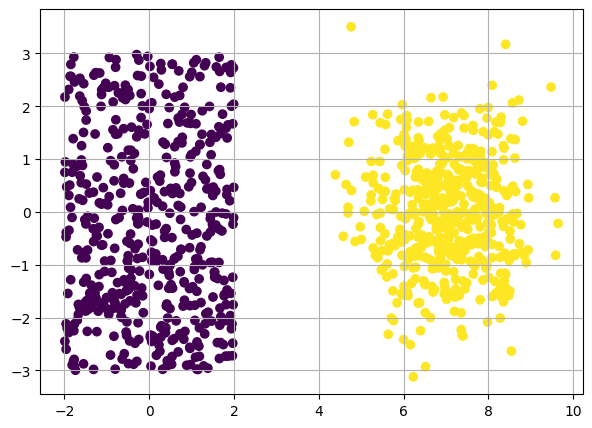

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1],c=Cy)
plt.grid()

In [ ]:
# Create DATAFRAME with a dictionary where keys are column names and values are the arrays
data = {'Column1_feature': X[:,0], 'Column2_feature': X[:,1], 'Column3_target': Cy}

# Create the DataFrame
df = pd.DataFrame(data)
df.head(10)

Column1_feature  Column2_feature  Column3_target
0         1.803307        -2.056114             0.0
1        -0.188662         1.787202             0.0
2         1.652007        -0.324758             0.0
3         1.972536        -2.483994             0.0
4         0.510862         0.446358             0.0
5        -1.047636        -0.929032             0.0
6        -1.489892        -0.226538             0.0
7         0.746602         0.093097             0.0
8        -1.200387        -1.877824             0.0
9        -1.308765        -2.979490             0.0



> NOTE: all generated data strongly ordered! Let's shuffle



In [ ]:
# Shuffle the rows
df_shuffled = df.sample(frac=1).reset_index(drop=True)
print("\nShuffled DataFrame (original index retained):")
print(df_shuffled)


Shuffled DataFrame (original index retained):
     Column1_feature  Column2_feature  Column3_target
0           6.732199        -1.468247             1.0
1           5.450802         1.689432             1.0
2           8.396487        -0.782029             1.0
3           1.989030         2.728108             0.0
4           7.183138         1.113099             1.0
..               ...              ...             ...
995        -1.898265        -2.284510             0.0
996         0.545917         2.798966             0.0
997        -0.804940        -1.711149             0.0
998         8.938152        -0.717458             1.0
999         7.681126         1.122521             1.0

[1000 rows x 3 columns]


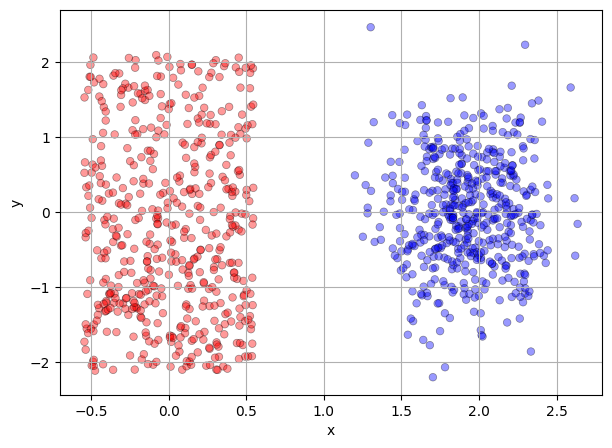

In [ ]:
plot_df_samples(df_shuffled)

In [ ]:
# Introduce some correlation to make PCA more effective
X_expanded = np.zeros((X.shape[0], 6))
X_expanded[:, :2] = X  # Copy original 2D data to first two columns

# Add the additional dimensions using your formulas
X_expanded[:, 2] = X_expanded[:, 0] * 0.8 + np.random.rand(X.shape[0]) * 2
X_expanded[:, 3] = X_expanded[:, 1] * 0.7 + np.random.rand(X.shape[0]) * 3
X_expanded[:, 4] = X_expanded[:, 3] * 0.3 + np.random.rand(X.shape[0]) * 4
X_expanded[:, 5] = X_expanded[:, 4] * 0.5 + np.random.rand(X.shape[0]) * 1

X = X_expanded
print('Shape of X now = ',X.shape)

Shape of X now =  (1000, 6)


In [ ]:
# save dataset to CSV file
df_shuffled.to_csv('ML_case_0_dataframe.csv', index=False)

> let's clear DF variables and upload CSV data

In [ ]:
df_shuffled = []
df_shuffled = pd.read_csv('ML_case_0_dataframe.csv', index_col=False)
df_shuffled.head(7)

Column1_feature  Column2_feature  Column3_target
0         6.732199        -1.468247             1.0
1         5.450802         1.689432             1.0
2         8.396487        -0.782029             1.0
3         1.989030         2.728108             0.0
4         7.183138         1.113099             1.0
5         1.000933         0.556772             0.0
6         1.803307        -2.056114             0.0

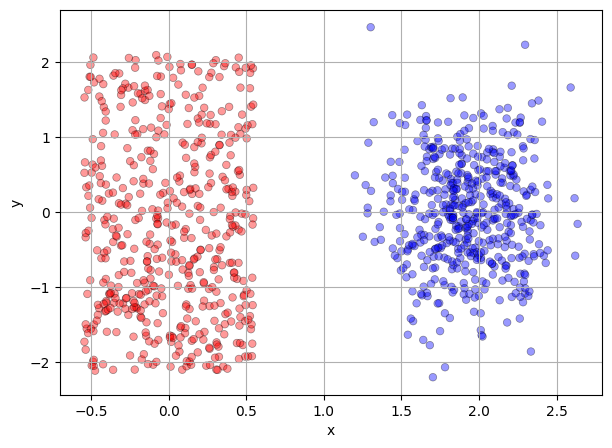

In [ ]:
plot_df_samples(df_shuffled)

In [ ]:
# Create DATAFRAME with a dictionary where keys are column names and values are the arrays
data_with_extened_dim = {'Column1_feature': X[:,0], 'Column2_feature': X[:,1],'Column3_target': Cy,
                         'ext_col_1':X[:,2],'ext_col_2':X[:,3],'ext_col_3':X[:,3],'ext_col_4':X[:,4], 'ext_col_5':X[:,5],
                         }

# Create the DataFrame
df_with_extened_dim = pd.DataFrame(data_with_extened_dim)
df_with_extened_dim.head(10)

Column1_feature  Column2_feature  Column3_target  ext_col_1  ext_col_2  \
0         1.803307        -2.056114             0.0   1.701402   0.243183   
1        -0.188662         1.787202             0.0   1.343672   3.628760   
2         1.652007        -0.324758             0.0   1.462397   1.017988   
3         1.972536        -2.483994             0.0   1.610938   0.076159   
4         0.510862         0.446358             0.0   0.819013   3.302536   
5        -1.047636        -0.929032             0.0   0.869130   1.005534   
6        -1.489892        -0.226538             0.0   0.206116   1.239739   
7         0.746602         0.093097             0.0   0.750926   0.232262   
8        -1.200387        -1.877824             0.0  -0.534462   1.432990   
9        -1.308765        -2.979490             0.0  -0.657749  -0.017615   

   ext_col_3  ext_col_4  ext_col_5  
0   0.243183   1.513718   1.290877  
1   3.628760   3.380769   2.472355  
2   1.017988   2.877352   1.544651  
3   0.076159   2.714854   1.813833  
4   3.302536   2.455737   1.371244  
5   1.005534   3.617778   1.894079  
6   1.239739   2.369618   1.798045  
7   0.232262   1.947584   1.149708  
8   1.432990   2.398178   1.566736  
9  -0.017615   1.882829   1.748766

## PCA + Kernel PCA

Text(0.5, 1.0, 'Observations')

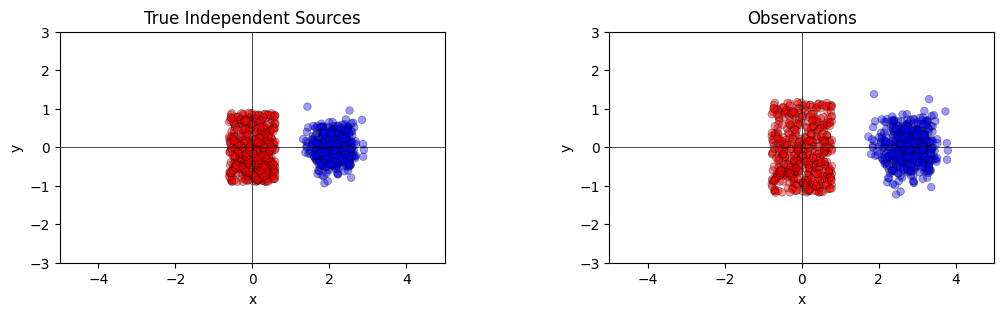

In [ ]:
plt.rcParams["figure.figsize"] = (13,3)

plt.subplot(1, 2, 1)
plot_samples(X_true / X_true.std(), color=Cy)
plt.title("True Independent Sources")

plt.subplot(1, 2, 2)
plot_samples(X/ np.std(X), color=Cy)
plt.title("Observations")




In [ ]:
import seaborn as sns

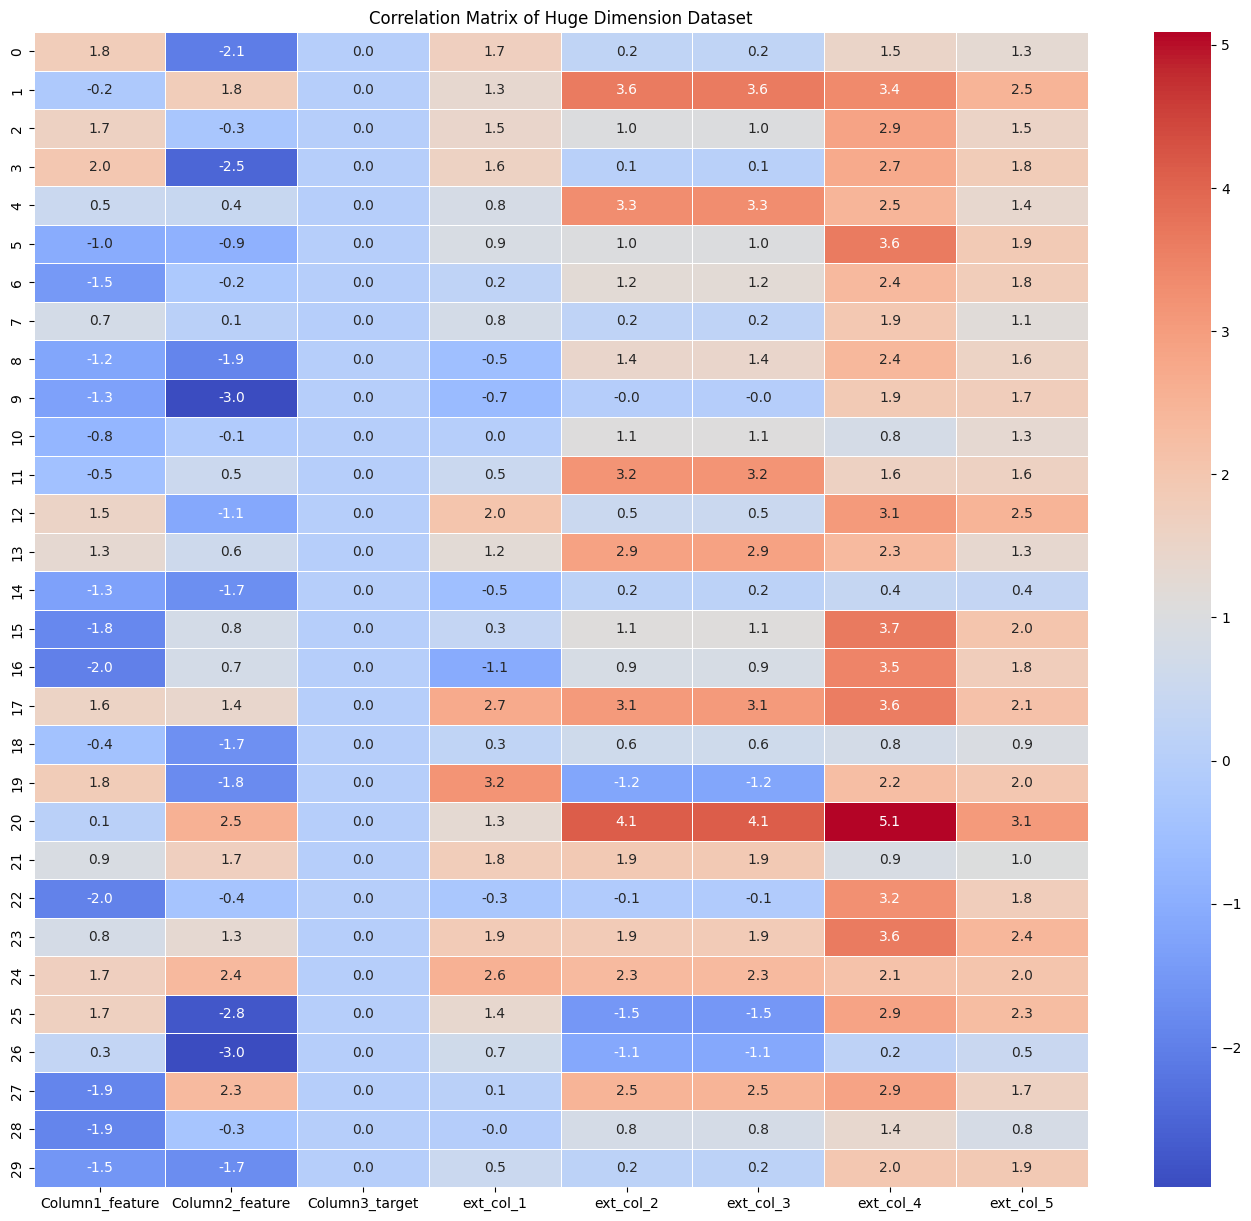

In [ ]:
plt.figure(figsize=(17, 15)) # Adjust figure size as needed
sns.heatmap(df_with_extened_dim.head(30), annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix of Huge Dimension Dataset')
plt.show()

In [ ]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X/ np.std(X))
print(pca.explained_variance_ratio_)

[0.79235596 0.12597    0.05481865 0.01714997 0.00732444 0.00238098]


Text(0.5, 1.0, 'After PCA reduction')

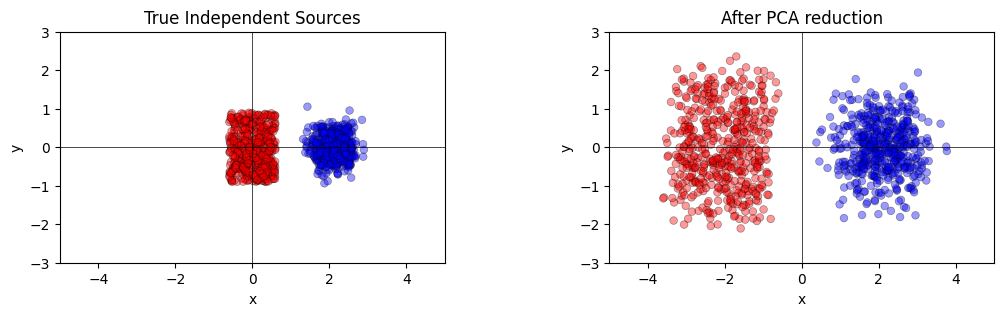

In [ ]:
plt.rcParams["figure.figsize"] = (13,3)

plt.subplot(1, 2, 1)
plot_samples(X_true / X_true.std(), color=Cy)
plt.title("True Independent Sources")

plt.subplot(1, 2, 2)
plot_samples(X_pca / X_pca.std(), color = Cy)
plt.title("After PCA reduction")




#Case 1: Vanilla two separaterd dataset

## Generate Data and crate table CSV file

Let's generate two dimentional dataset. All samples will have two state (label) red or blue - it's a categorical statement.

A lot of ML task can be transform to "CSV tabel ML classification problem".

In [ ]:
# samples clearly separated and labeled.

# samples clearly separated and labeled. Generate core of dataset

import random
n_samples = 500

Ya = np.random.normal(7, 1, n_samples)
Yb = np.random.normal(0, 1, n_samples)
Cb = np.ones(n_samples) #label


Xa = np.random.uniform(-2,2,n_samples)
Xb = np.random.uniform(-3,3,n_samples)
Ca = np.zeros(n_samples) #label

A = np.hstack((Xa,Ya))
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
#Rotation = np.array([[3, 1], [-1.5, 1]])  # Mixing matrix
Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix
#Rotation = np.array([[1, 0], [0, 1]])

X_mixed = np.dot(X, Rotation.T)  # Generate observations

X_true = X
X = X_mixed

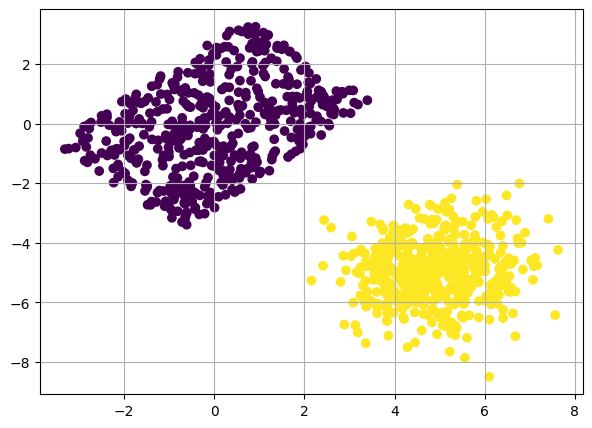

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1],c=Cy)
plt.grid()

In [ ]:
# Create DATAFRAME with a dictionary where keys are column names and values are the arrays
data = {'Column1_feature': X[:,0], 'Column2_feature': X[:,1], 'Column3_target': Cy}

# Create the DataFrame
df = pd.DataFrame(data)
df.head(10)

Column1_feature  Column2_feature  Column3_target
0        -1.216605        -2.244591             0.0
1        -1.688713         0.712920             0.0
2        -0.212427        -0.053069             0.0
3         0.241335        -1.897855             0.0
4         0.591761        -1.512527             0.0
5        -0.654716        -3.205542             0.0
6        -0.584090        -0.394560             0.0
7        -1.914234        -1.902955             0.0
8        -2.552295        -1.590260             0.0
9        -0.538144        -2.443017             0.0



> NOTE: all generated data strongly ordered! Let's shuffle



In [ ]:
# Shuffle the rows
df_shuffled = df.sample(frac=1).reset_index(drop=True)
print("\nShuffled DataFrame (original index retained):")
print(df_shuffled)


Shuffled DataFrame (original index retained):
     Column1_feature  Column2_feature  Column3_target
0           0.574968        -1.159677             0.0
1           4.442343        -5.567056             1.0
2          -0.420508        -2.816010             0.0
3          -0.251606        -0.883693             0.0
4           0.189334        -2.056719             0.0
..               ...              ...             ...
995         2.664664         0.460690             0.0
996         5.306781        -3.128267             1.0
997         1.669145         2.422750             0.0
998         5.137470        -6.806505             1.0
999        -0.712438         0.195646             0.0

[1000 rows x 3 columns]


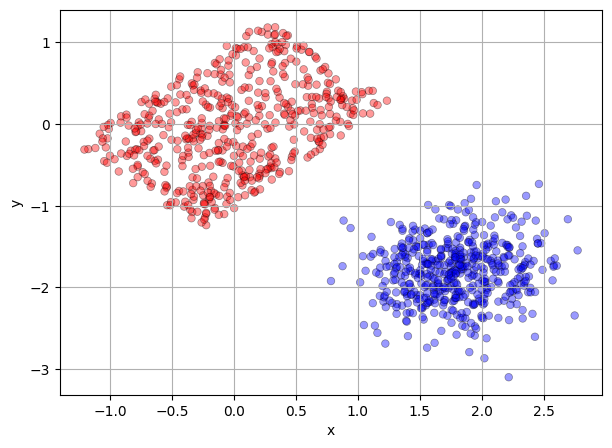

In [ ]:
plot_df_samples(df_shuffled)

In [ ]:
# save dataset to CSV file
df_shuffled.to_csv('ML_case_1_dataframe.csv', index=False)

> let's clear DF variables and upload CSV data

In [ ]:
df_shuffled = []
df_shuffled = pd.read_csv('ML_case_1_dataframe.csv', index_col=False)
df_shuffled.head(7)

Column1_feature  Column2_feature  Column3_target
0         0.574968        -1.159677             0.0
1         4.442343        -5.567056             1.0
2        -0.420508        -2.816010             0.0
3        -0.251606        -0.883693             0.0
4         0.189334        -2.056719             0.0
5         0.395643        -0.419610             0.0
6        -2.285170        -0.893083             0.0

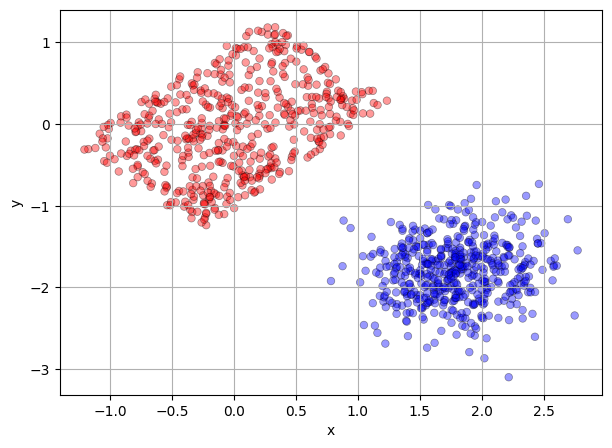

In [ ]:
plot_df_samples(df_shuffled)

## ML Task: use SVM for classification

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

Accuracy: 1.0000


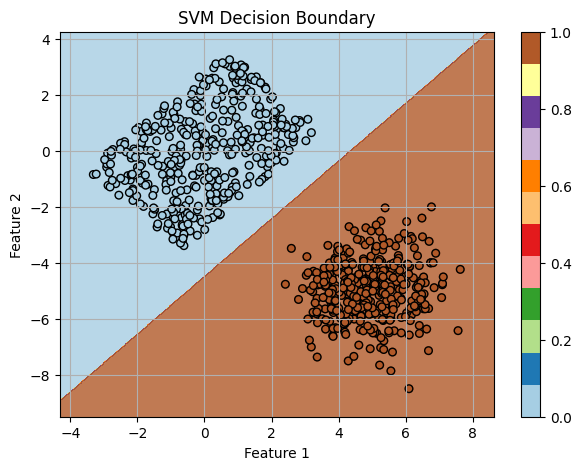


Number of support vectors: 3
Support vectors per class: [2 1]


In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, Cy, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(np.array(df_shuffled[['Column1_feature', 'Column2_feature']]),
                                                    np.array(df_shuffled['Column3_target']),
                                                    test_size=0.2,
                                                    random_state=37)


# Create an SVM classifier
# You can experiment with different kernels: 'linear', 'rbf', 'poly', 'sigmoid'
clf = svm.SVC(kernel='linear', C=1.0, gamma='scale')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


# Visualize the decision boundary (for 2D data)
plt.figure(figsize=(7, 5))
# Plot the data points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30)
plt.colorbar(scatter)
plt.grid()

# Create a mesh to plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points again (to ensure they're visible)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

# Print support vectors information
print(f"\nNumber of support vectors: {len(clf.support_vectors_)}")
print(f"Support vectors per class: {clf.n_support_}")


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       102
         1.0       1.00      1.00      1.00        98

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



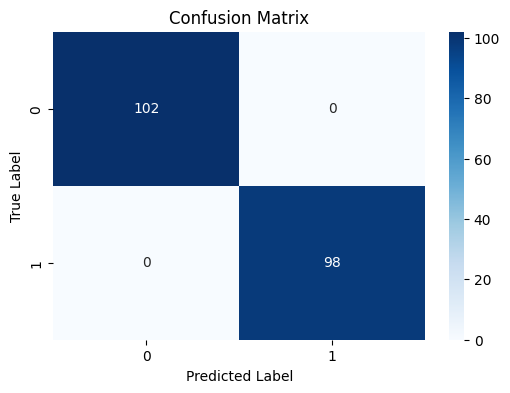

In [ ]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Case 2: Two mixed but ortho-separeated dataset



## Generate Data and crate table CSV file

Let's generate two dimentional dataset. All samples will have two state (label) red or blue - it's a categorical statement.

A lot of ML task can be transform to "CSV tabel ML classification problem".

In [ ]:
# samples clearly separated and labeled.

# samples clearly separated and labeled. Generate core of dataset

import random
n_samples = 500

Ya = np.random.normal(7, 1, n_samples)
Yb = np.random.normal(0, 1, n_samples)
Cb = np.ones(n_samples) #label


Xa = np.random.uniform(-2,2,n_samples)
Xb = np.random.uniform(-3,3,n_samples)
Ca = np.zeros(n_samples) #label

A = np.hstack((Xa,Ya))
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
#Rotation = np.array([[13, 1], [-1.5, 1]])  # Mixing matrix
Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix
#Rotation = np.array([[1, 0], [0, 1]])

X_mixed = np.dot(X, Rotation.T)  # Generate observations

X_true = X
X = X_mixed

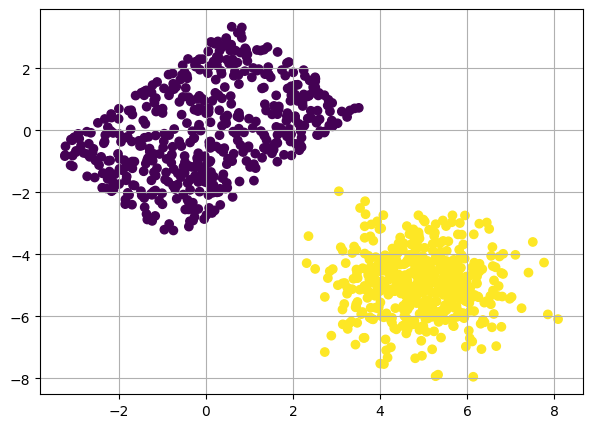

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1],c=Cy)
plt.grid()

In [ ]:
# Create DATAFRAME with a dictionary where keys are column names and values are the arrays
data = {'Column1_feature': X[:,0], 'Column2_feature': X[:,1], 'Column3_target': Cy}

# Create the DataFrame
df = pd.DataFrame(data)
df.head(10)

Column1_feature  Column2_feature  Column3_target
0        -0.962466         1.355347             0.0
1         0.256305        -1.999680             0.0
2         2.182247         0.045514             0.0
3        -2.689587        -0.431884             0.0
4        -0.391520        -3.104250             0.0
5         0.467238         2.978271             0.0
6         0.793704         2.511938             0.0
7        -1.164830        -2.761297             0.0
8         1.015967        -1.179652             0.0
9         1.795080        -0.788145             0.0



> NOTE: all generated data strongly ordered! Let's shuffle



In [ ]:
# Shuffle the rows
df_shuffled = df.sample(frac=1).reset_index(drop=True)
print("\nShuffled DataFrame (original index retained):")
print(df_shuffled)


Shuffled DataFrame (original index retained):
     Column1_feature  Column2_feature  Column3_target
0          -1.990967        -0.121109             0.0
1           1.358739         1.814413             0.0
2           4.299529        -4.520287             1.0
3           2.582756         1.128560             0.0
4          -2.187970        -1.567827             0.0
..               ...              ...             ...
995        -2.167979        -1.961548             0.0
996         4.010766        -5.549664             1.0
997         5.162476        -4.477453             1.0
998         5.456543        -4.783288             1.0
999         3.650959        -3.974036             1.0

[1000 rows x 3 columns]


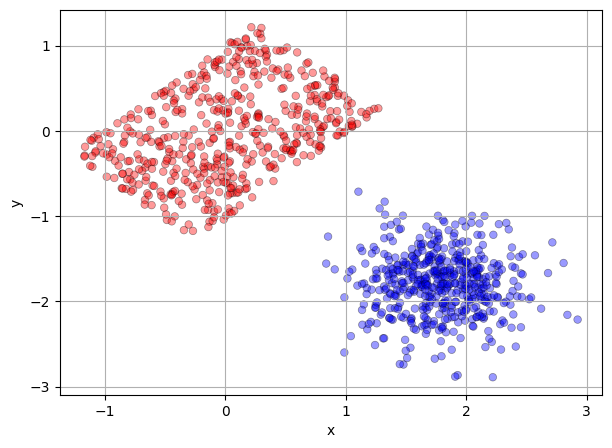

In [ ]:
plot_df_samples(df_shuffled)

In [ ]:
# save dataset to CSV file
df_shuffled.to_csv('ML_case_2_dataframe.csv', index=False)

> let's clear DF variables and upload CSV data

In [ ]:
df_shuffled = []
df_shuffled = pd.read_csv('ML_case_2_dataframe.csv', index_col=False)
df_shuffled.head(7)

Column1_feature  Column2_feature  Column3_target
0        -1.990967        -0.121109             0.0
1         1.358739         1.814413             0.0
2         4.299529        -4.520287             1.0
3         2.582756         1.128560             0.0
4        -2.187970        -1.567827             0.0
5        -0.260998        -2.602670             0.0
6        -3.226593        -0.513379             0.0

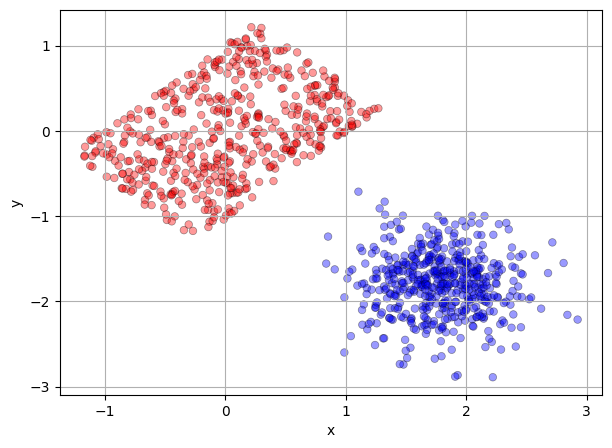

In [ ]:
plot_df_samples(df_shuffled)

## PCA + Kernel PCA

Text(0.5, 1.0, 'Observations')

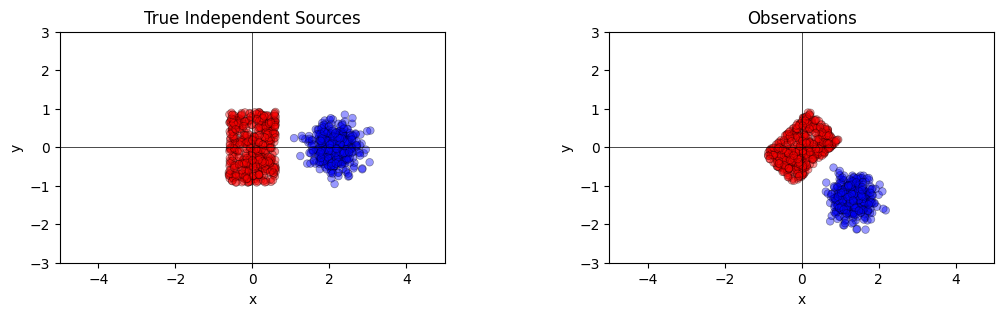

In [ ]:
plt.rcParams["figure.figsize"] = (13,3)

plt.subplot(1, 2, 1)
plot_samples(X_true / X_true.std(), color=Cy)
plt.title("True Independent Sources")

plt.subplot(1, 2, 2)
plot_samples(X/ np.std(X), color=Cy)
plt.title("Observations")




In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X/ np.std(X))
#X_pca = pca.fit_transform(X/ np.std(X))
print(pca.explained_variance_ratio_)

[0.86739575 0.13260425]


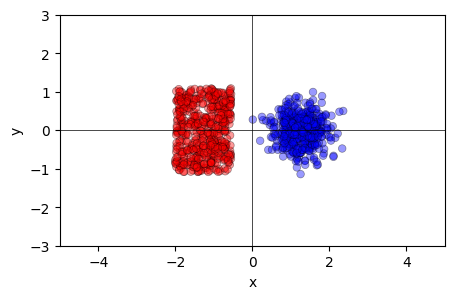

In [ ]:
#X_pca = np.fliplr(X_pca)
plot_samples(X_pca / X_pca.std(), color = Cy)

Text(0.5, 1.0, 'PCA components done')

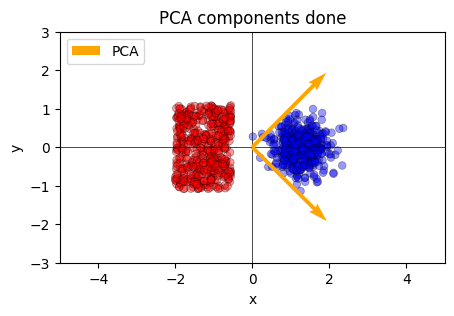

In [ ]:
axis_list = [(pca.components_.T, "orange", "PCA")]
plot_samples(X_pca / np.std(X_pca), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("PCA components done")

In [ ]:
from scipy.stats import shapiro  #Shapiro test for non-gaussian measure
#it was published in 1965 by Samuel Sanford Shapiro and Martin Wilk

stat, p = shapiro(X_mixed)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.966, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
from scipy.stats import kstest  # It is named after Andrey Kolmogorov and Nikolai Smirnov.

kstest(X, "norm", alternative='less')

KstestResult(statistic=array([0.5489538 , 0.03430566]), pvalue=array([1.02232863e-283, 9.28541789e-002]), statistic_location=array([1.85153656, 1.75424413]), statistic_sign=array([-1., -1.]))

Функции ядра (`kernel`) в `KernelPCA`:

- **`'linear'`**: $K(x, y) = x^T y$ (скалярное произведение)
- **`'poly'`**: $K(x, y) = (\gamma x^T y + r)^d$ (полиномиальное ядро)
- **`'rbf'`**: $K(x, y) = \exp(-\gamma \|x - y\|^2)$ (радиальная базисная функция)
- **`'sigmoid'`**: $K(x, y) = \tanh(\gamma x^T y + r)$ (сигмоидальное ядро)
- **`'cosine'`**: $K(x, y) = \frac{x^T y}{\|x\| \|y\|}$ (косинусная близость)



Kernel PCA работает в пространстве повышенной размерности без явного вычисления преобразования:

1. Данные отображаются в пространство высокой размерности через функцию $\phi(x)$
2. Вычисляется матрица попарных функций ядра:
   $$K_{ij} = K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$$
3.  Матрица ядра центрируется в feature space
4. Находятся собственные векторы центрированной ядерной матрицы

Собственные векторы $\alpha^k$ и значения $\lambda_k$ находятся из:
$$K\alpha^k = \lambda_k\alpha^k$$

Проекция нового объекта $x$ на k-ю главную компоненту:
$$t_k(x) = \sum_{i=1}^n \alpha_i^k K(x, x_i)$$


In [ ]:
#kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’

kernel_pca = KernelPCA(
    n_components=2, kernel="linear", fit_inverse_transform=True, alpha=0.1
)

X_kernel_pca = kernel_pca.fit(X).transform(X)

Text(0.5, 1.0, 'Kernel PCA components done')

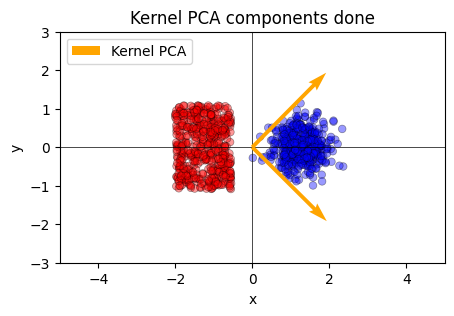

In [ ]:
axis_list = [(pca.components_.T, "orange", "Kernel PCA")]
#X_kernel_pca = np.fliplr(X_kernel_pca)
plot_samples(X_kernel_pca / np.std(X_kernel_pca), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Kernel PCA components done")

#Case 3: Two mixed but NON-ORTHO separated

## Generate Data and crate table CSV file

Let's generate two dimentional dataset. All samples will have two state (label) red or blue - it's a categorical statement.

A lot of ML task can be transform to "CSV tabel ML classification problem".

In [ ]:
# samples clearly separated and labeled.

# samples clearly separated and labeled. Generate core of dataset

import random
n_samples = 500

Ya = np.random.normal(7, 1, n_samples)
Yb = np.random.normal(0, 1, n_samples)
Cb = np.ones(n_samples) #label


Xa = np.random.uniform(-2,2,n_samples)
Xb = np.random.uniform(-3,3,n_samples)
Ca = np.zeros(n_samples) #label

A = np.hstack((Xa,Ya))
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
Rotation = np.array([[13, 1], [-1.5, 1]])  # Mixing matrix
#Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix
#Rotation = np.array([[1, 0], [0, 1]])

X_mixed = np.dot(X, Rotation.T)  # Generate observations

X_true = X
X = X_mixed

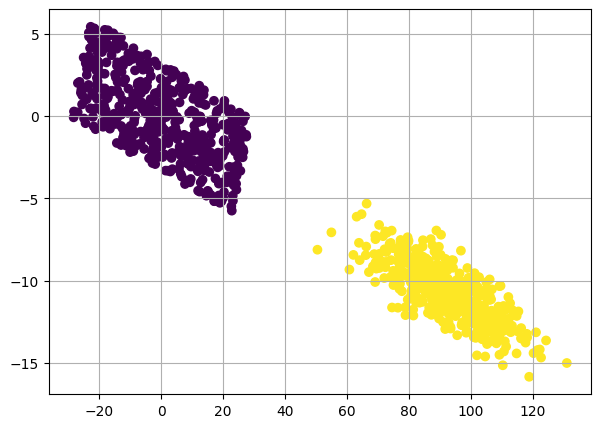

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1],c=Cy)
plt.grid()

In [ ]:
# Create DATAFRAME with a dictionary where keys are column names and values are the arrays
data = {'Column1_feature': X[:,0], 'Column2_feature': X[:,1], 'Column3_target': Cy}

# Create the DataFrame
df = pd.DataFrame(data)
df.head(10)

Column1_feature  Column2_feature  Column3_target
0       -23.667423         1.732833             0.0
1        -5.834510         2.832994             0.0
2        23.695246        -1.993305             0.0
3        11.653430        -1.795399             0.0
4        20.415753        -1.445499             0.0
5        11.950097        -4.528022             0.0
6        -1.868734        -2.140274             0.0
7       -20.732137         2.326090             0.0
8        26.187482        -1.021999             0.0
9       -22.925781         3.021159             0.0



> NOTE: all generated data strongly ordered! Let's shuffle



In [ ]:
# Shuffle the rows
df_shuffled = df.sample(frac=1).reset_index(drop=True)
print("\nShuffled DataFrame (original index retained):")
print(df_shuffled)


Shuffled DataFrame (original index retained):
     Column1_feature  Column2_feature  Column3_target
0          24.882267        -1.859839             0.0
1          92.038632        -9.960268             1.0
2         104.767896       -10.768188             1.0
3         104.991103       -11.864314             1.0
4         -22.957419         3.272200             0.0
..               ...              ...             ...
995        21.455015        -3.814122             0.0
996        21.518933        -0.826590             0.0
997        93.694479       -10.983559             1.0
998        -6.018894         0.440712             0.0
999       106.645894       -12.794805             1.0

[1000 rows x 3 columns]


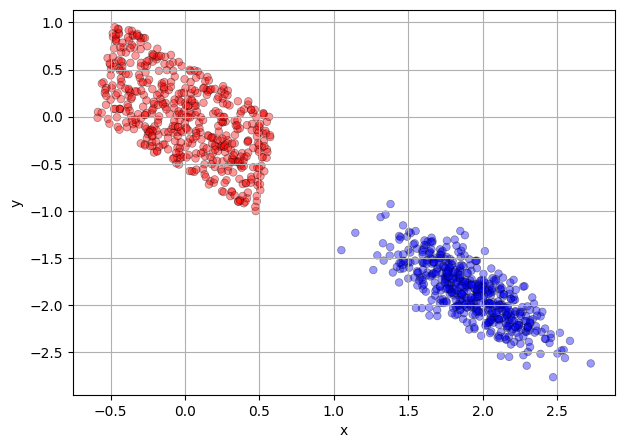

In [ ]:
plot_df_samples(df_shuffled)

In [ ]:
# save dataset to CSV file
df_shuffled.to_csv('ML_case_3_dataframe.csv', index=False)

> let's clear DF variables and upload CSV data

In [ ]:
df_shuffled = []
df_shuffled = pd.read_csv('ML_case_3_dataframe.csv', index_col=False)
df_shuffled.head(7)

Column1_feature  Column2_feature  Column3_target
0        24.882267        -1.859839             0.0
1        92.038632        -9.960268             1.0
2       104.767896       -10.768188             1.0
3       104.991103       -11.864314             1.0
4       -22.957419         3.272200             0.0
5        24.027047        -0.645971             0.0
6       118.180788       -13.451772             1.0

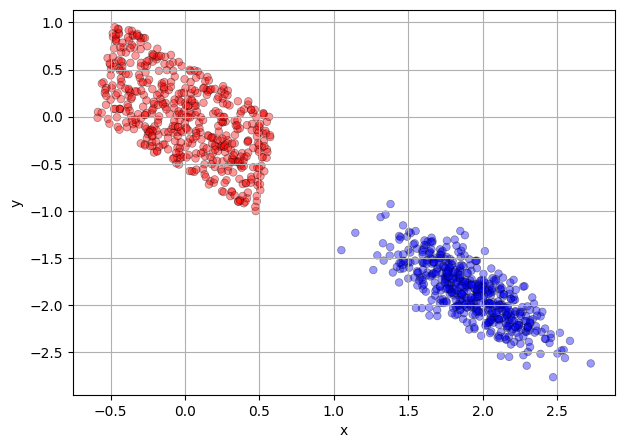

In [ ]:
plot_df_samples(df_shuffled)

## PCA + Kernel PCA

Text(0.5, 1.0, 'Observations')

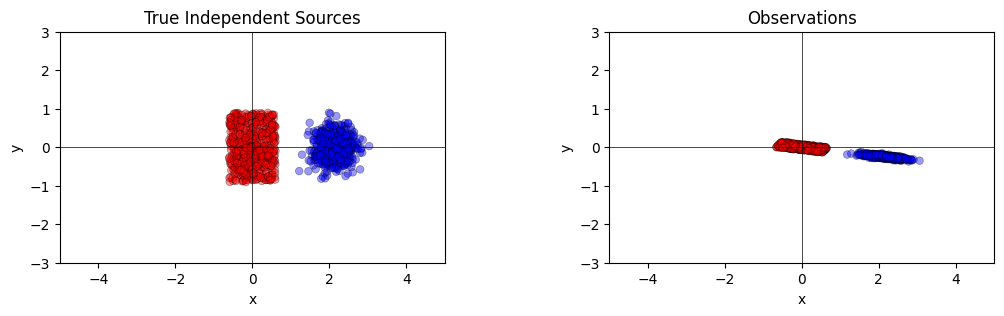

In [ ]:
plt.rcParams["figure.figsize"] = (13,3)

plt.subplot(1, 2, 1)
plot_samples(X_true / X_true.std(), color=Cy)
plt.title("True Independent Sources")

plt.subplot(1, 2, 2)
plot_samples(X/ np.std(X), color=Cy)
plt.title("Observations")




In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X/ np.std(X))
#X_pca = pca.fit_transform(X/ np.std(X))
print(pca.explained_variance_ratio_)

[0.99897703 0.00102297]


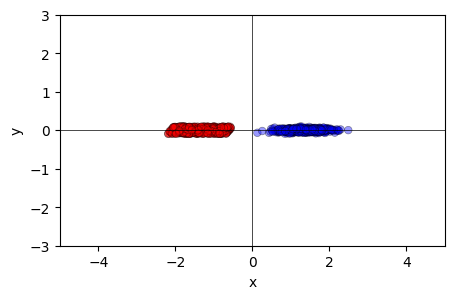

In [ ]:
#X_pca = np.fliplr(X_pca)
plot_samples(X_pca / X_pca.std(), color = Cy)

Text(0.5, 1.0, 'PCA components done')

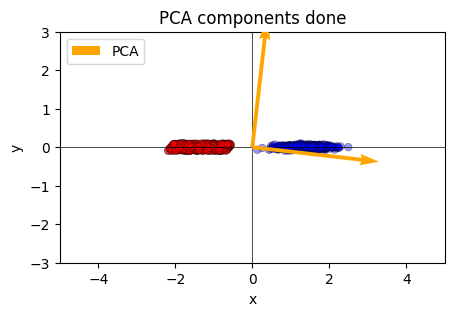

In [ ]:
axis_list = [(pca.components_.T, "orange", "PCA")]
plot_samples(X_pca / np.std(X_pca), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("PCA components done")

## ICA

In [ ]:
#ica = FastICA(n_components=2, random_state=123, whiten="arbitrary-variance")
ica = FastICA(n_components=2, whiten="arbitrary-variance")

#X_ica = ica.fit_transform(X/ np.std(X))  # Estimate the sources
X_ica = ica.fit_transform(X_mixed/ np.std(X_mixed))  # Estimate the sources

Text(0.5, 1.0, 'ICA components done')

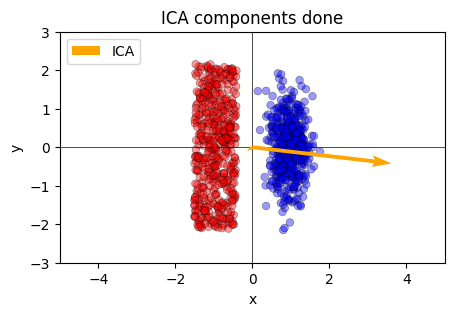

In [ ]:
axis_list = [(ica.mixing_, "orange", "ICA")]
X_ica = np.fliplr(X_ica)
plot_samples(X_ica / np.std(X_ica), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("ICA components done")

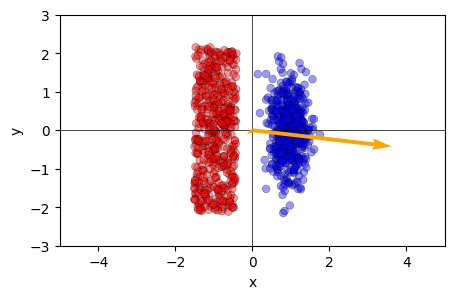

In [ ]:
X_ica_pca = pca.fit_transform(X_ica)
X_ica_pca = np.fliplr(X_ica_pca)

plot_samples(X_ica_pca / np.std(X_ica_pca), axis_list=axis_list, color=Cy)

## Compare PCA and ICA

Text(0.5, 1.0, 'Observations')

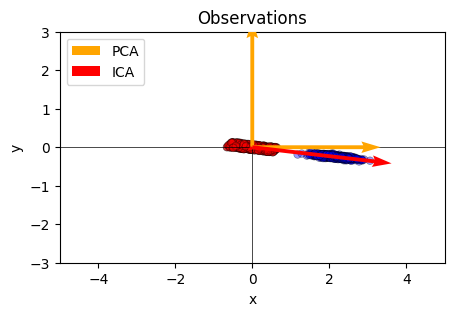

In [ ]:
plt.rcParams["figure.figsize"] = (13,3)

axis_list = [(pca.components_.T, "orange", "PCA"), (ica.mixing_, "red", "ICA")]
plot_samples(X / np.std(X), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Observations")

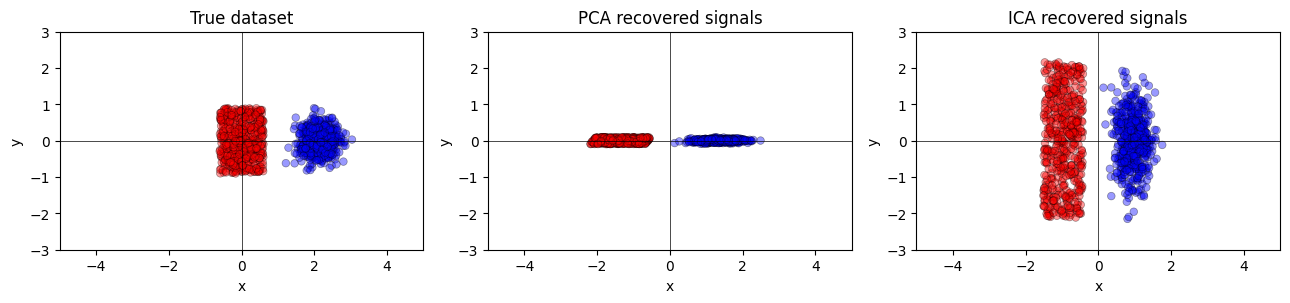

In [ ]:
plt.rcParams["figure.figsize"] = (13,5)


plt.subplot(1, 3, 1)
#plot_samples(X / X.std(),color=Cy)
plot_samples(X_true/ np.std(X_true), color=Cy)
plt.title("True dataset")


plt.subplot(1, 3, 2)
plot_samples(X_pca/ np.std(X_pca), color=Cy)
plt.title("PCA recovered signals")


plt.subplot(1, 3, 3)
plot_samples(X_ica / np.std(X_ica), color=Cy)
plt.title("ICA recovered signals")

plt.tight_layout()
plt.show()

#Case 4: Two mixed NON-ORTHO with the same probability function core model

## Generate Data and crate table CSV file

Let's generate two dimentional dataset. All samples will have two state (label) red or blue - it's a categorical statement.

A lot of ML task can be transform to "CSV tabel ML classification problem".

In [ ]:
# samples clearly separated and labeled.

# samples clearly separated and labeled. Generate core of dataset

import random
n_samples = 500

Ya = np.random.normal(7, 1, n_samples)
Yb = np.random.normal(0, 1, n_samples)
Cb = np.ones(n_samples) #label


Xa = np.random.normal(-2,2,n_samples)
Xb = np.random.normal(-3,3,n_samples)
Ca = np.zeros(n_samples) #label

A = np.hstack((Xa,Ya))
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
Rotation = np.array([[7, 1], [-1.5, 1]])  # Mixing matrix
#Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix
#Rotation = np.array([[1, 0], [0, 1]])

X_mixed = np.dot(X, Rotation.T)  # Generate observations

X_true = X
X = X_mixed

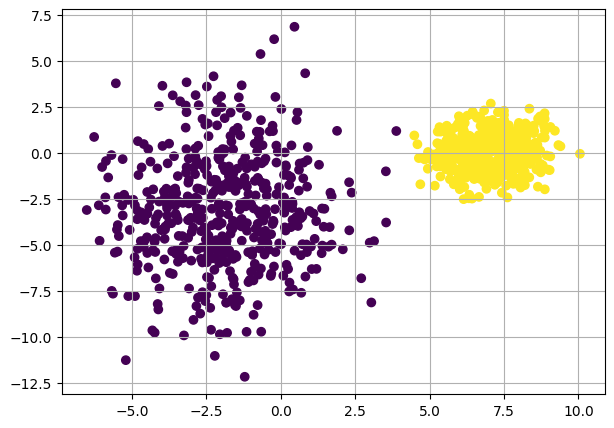

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.scatter(X_true[:, 0], X_true[:, 1],c=Cy)
plt.grid()

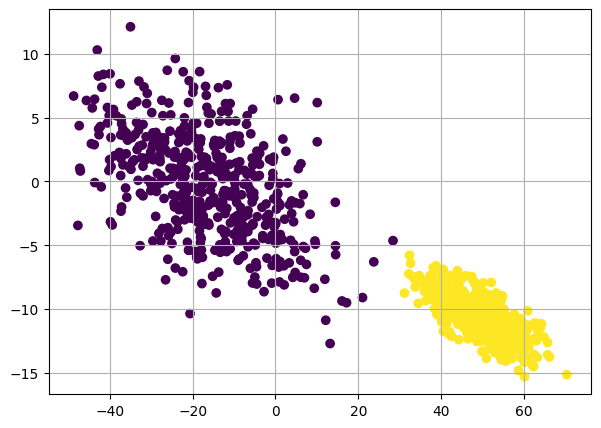

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1],c=Cy)
plt.grid()

In [ ]:
# Create DATAFRAME with a dictionary where keys are column names and values are the arrays
data = {'Column1_feature': X[:,0], 'Column2_feature': X[:,1], 'Column3_target': Cy}

# Create the DataFrame
df = pd.DataFrame(data)
df.head(10)

Column1_feature  Column2_feature  Column3_target
0        -8.098362        -4.642066             0.0
1         4.401475        -4.932396             0.0
2       -31.979540         1.193011             0.0
3        28.367668        -4.628678             0.0
4       -22.526875        -1.818827             0.0
5       -37.352324         3.638798             0.0
6       -13.235800        -1.638249             0.0
7       -18.116229         1.234174             0.0
8       -35.691648         3.228645             0.0
9        10.080293         6.165585             0.0



> NOTE: all generated data strongly ordered! Let's shuffle



In [ ]:
# Shuffle the rows
df_shuffled = df.sample(frac=1).reset_index(drop=True)
print("\nShuffled DataFrame (original index retained):")
print(df_shuffled)


Shuffled DataFrame (original index retained):
     Column1_feature  Column2_feature  Column3_target
0          -9.159658        -3.805430             0.0
1          44.068984       -11.160746             1.0
2           9.362795        -8.358211             0.0
3         -23.351560         3.043757             0.0
4          -0.445287         1.896856             0.0
..               ...              ...             ...
995        -3.855395         1.343220             0.0
996         1.633700        -4.537468             0.0
997        -8.768729        -6.072965             0.0
998       -18.843052        -6.056551             0.0
999       -36.761049         2.109210             0.0

[1000 rows x 3 columns]


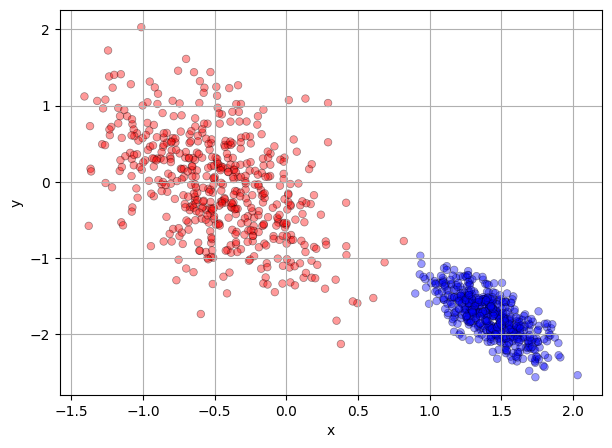

In [ ]:
plot_df_samples(df_shuffled)

In [ ]:
# save dataset to CSV file
df_shuffled.to_csv('ML_case_4_dataframe.csv', index=False)

> let's clear DF variables and upload CSV data

In [ ]:
df_shuffled = []
df_shuffled = pd.read_csv('ML_case_4_dataframe.csv', index_col=False)
df_shuffled.head(7)

Column1_feature  Column2_feature  Column3_target
0        -9.159658        -3.805430             0.0
1        44.068984       -11.160746             1.0
2         9.362795        -8.358211             0.0
3       -23.351560         3.043757             0.0
4        -0.445287         1.896856             0.0
5        55.671084       -14.047410             1.0
6       -37.702094         2.267627             0.0

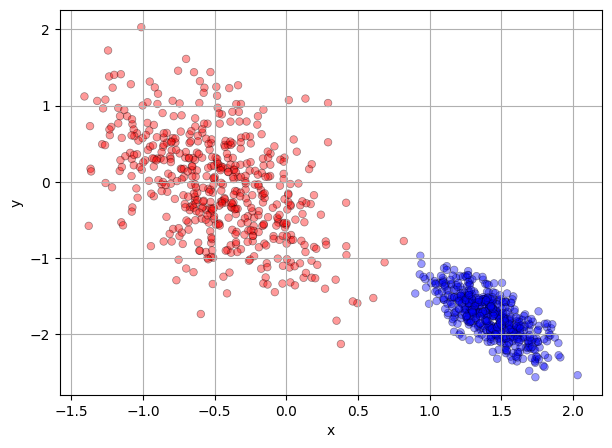

In [ ]:
plot_df_samples(df_shuffled)

## PCA + Kernel PCA

Text(0.5, 1.0, 'Observations')

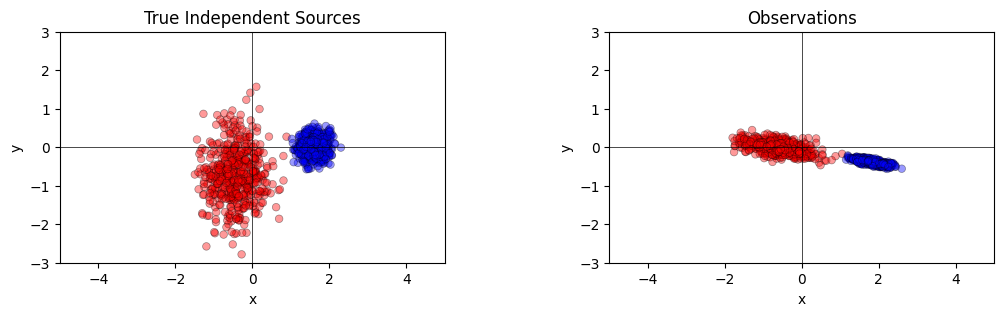

In [ ]:
plt.rcParams["figure.figsize"] = (13,3)

plt.subplot(1, 2, 1)
plot_samples(X_true / X_true.std(), color=Cy)
plt.title("True Independent Sources")

plt.subplot(1, 2, 2)
plot_samples(X/ np.std(X), color=Cy)
plt.title("Observations")




In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X/ np.std(X))
#X_pca = pca.fit_transform(X/ np.std(X))
print(pca.explained_variance_ratio_)

[0.99454835 0.00545165]


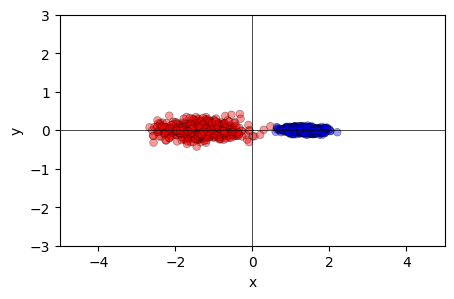

In [ ]:
#X_pca = np.fliplr(X_pca)
plot_samples(X_pca / X_pca.std(), color = Cy)

Text(0.5, 1.0, 'PCA components done')

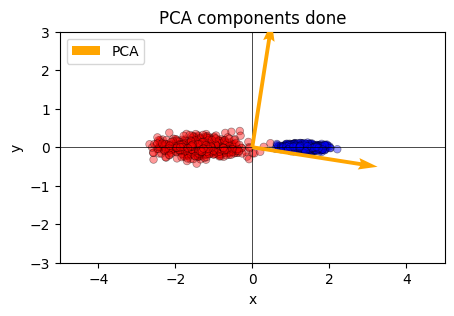

In [ ]:
axis_list = [(pca.components_.T, "orange", "PCA")]
plot_samples(X_pca / np.std(X_pca), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("PCA components done")

## ICA

In [ ]:
#ica = FastICA(n_components=2, random_state=123, whiten="arbitrary-variance")
ica = FastICA(n_components=2, whiten="arbitrary-variance")

X_ica = ica.fit_transform(X_mixed/ np.std(X_mixed))  # Estimate the sources

Text(0.5, 1.0, 'ICA components done')

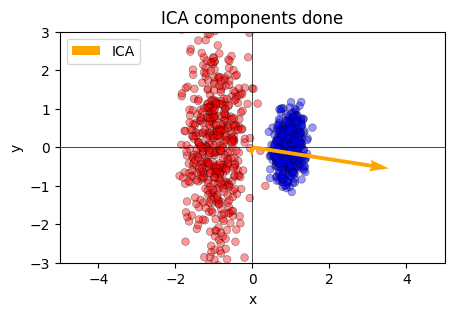

In [ ]:
axis_list = [(ica.mixing_, "orange", "ICA")]
X_ica = np.fliplr(X_ica)
plot_samples(X_ica / np.std(X_ica), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("ICA components done")

## Compare PCA and ICA

Text(0.5, 1.0, 'Observations')

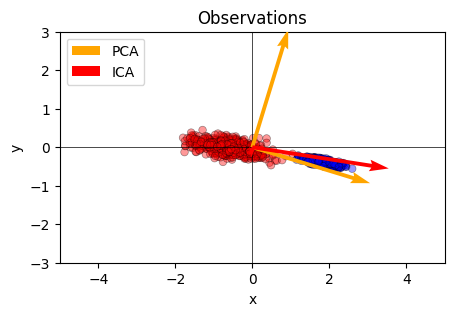

In [ ]:
plt.rcParams["figure.figsize"] = (13,3)

axis_list = [(pca.components_.T, "orange", "PCA"), (ica.mixing_, "red", "ICA")]
plot_samples(X / np.std(X), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Observations")

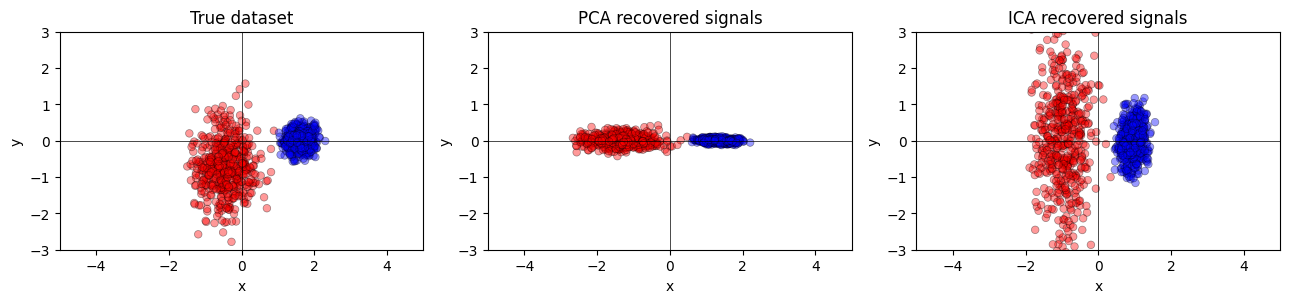

In [ ]:
plt.rcParams["figure.figsize"] = (13,5)


plt.subplot(1, 3, 1)
#plot_samples(X / X.std(),color=Cy)
plot_samples(X_true/ np.std(X_true), color=Cy)
plt.title("True dataset")


plt.subplot(1, 3, 2)
plot_samples(X_pca/ np.std(X_pca), color=Cy)
plt.title("PCA recovered signals")


plt.subplot(1, 3, 3)
plot_samples(X_ica / np.std(X_ica), color=Cy)
plt.title("ICA recovered signals")

plt.tight_layout()
plt.show()

## t-SNE

In [ ]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import datasets, manifold

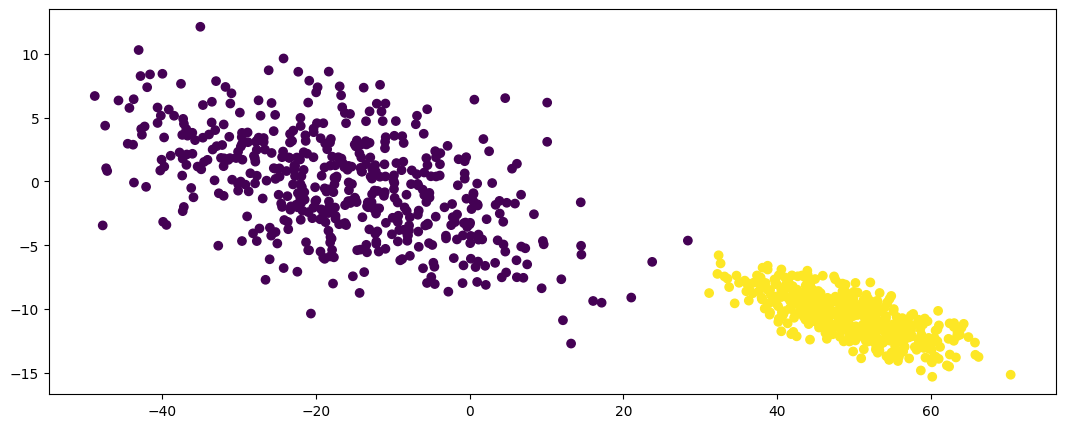

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Cy)

(np.float64(-54.678339171622085),
 np.float64(76.27976525095286),
 np.float64(-16.650770049064135),
 np.float64(13.466251838376829))

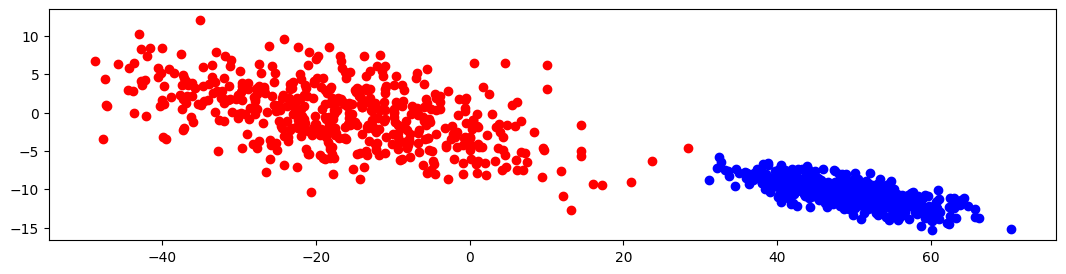

In [ ]:
plt.rcParams["figure.figsize"] = (13,3)

red = Cy == 0
blue = Cy == 1

plt.scatter(X[red, 0], X[red, 1], c="r")
plt.scatter(X[blue, 0], X[blue, 1], c="b")
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")


circles, perplexity=3 in 1.6 sec
circles, perplexity=5 in 2.3 sec
circles, perplexity=7 in 1.8 sec
circles, perplexity=15 in 1.6 sec
circles, perplexity=20 in 2.9 sec
circles, perplexity=30 in 1.9 sec
circles, perplexity=40 in 2.1 sec


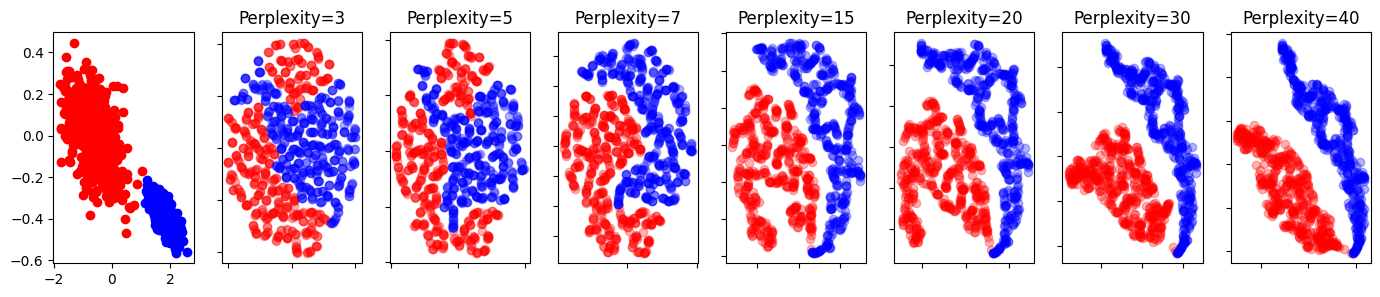

In [ ]:
n_components = 2
perplexities = [3, 5, 7, 15, 20, 30, 40]#, 50, 100]
#perplexities = [30]

(fig, subplots) = plt.subplots(1, len(perplexities)+1, figsize=(17, 3))

red = Cy == 0
blue = Cy == 1

X = X/np.std(X)

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[blue, 0], X[blue, 1], c="b")
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        max_iter=300,
    )
    Y = tsne.fit_transform(X/np.std(X))
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r", alpha=0.3)
    ax.scatter(Y[blue, 0], Y[blue, 1], c="b", alpha=0.3)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Case 5: Unsupervised learning for vanilla separated dataset

## Generate Data and crate table CSV file

Let's generate two dimentional dataset. All samples will have two state (label) red or blue - it's a categorical statement.

A lot of ML task can be transform to "CSV tabel ML classification problem".

In [ ]:
# samples clearly separated and labeled.

# samples clearly separated and labeled. Generate core of dataset

import random
n_samples = 500

Ya = np.random.normal(7, 1, n_samples)
Yb = np.random.normal(0, 1, n_samples)
Cb = np.ones(n_samples) #label


Xa = np.random.normal(-2,2,n_samples)
Xb = np.random.normal(-3,3,n_samples)
Ca = np.zeros(n_samples) #label

A = np.hstack((Xa,Ya))
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

XY_label = np.hstack((Cb,Cb))

# original data
X = X.T

# Mix data
Rotation = np.array([[7, 1], [-1.5, 1]])  # Mixing matrix
#Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix
#Rotation = np.array([[1, 0], [0, 1]])

X_mixed = np.dot(X, Rotation.T)  # Generate observations

X_true = X
X = X_mixed

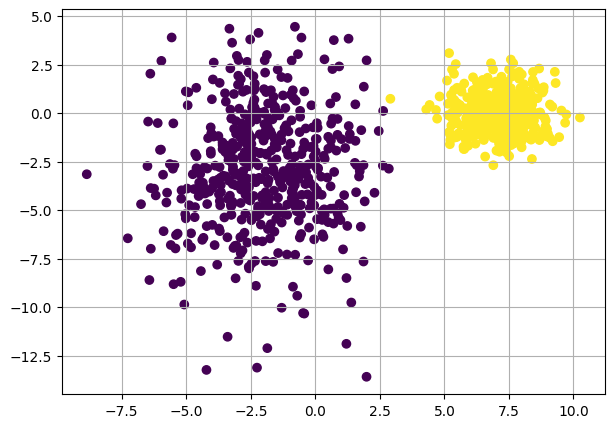

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.scatter(X_true[:, 0], X_true[:, 1],c=Cy)
plt.grid()

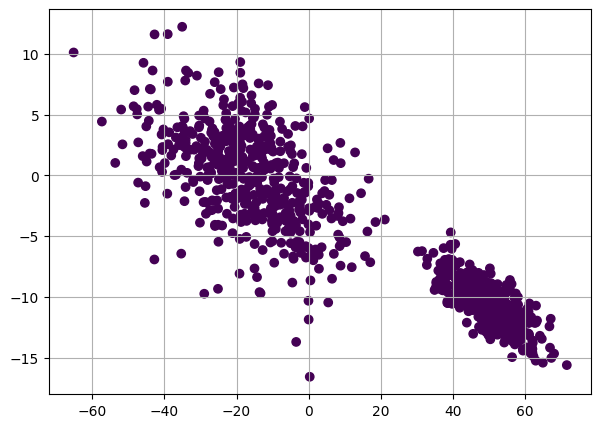

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1],c=XY_label)
plt.grid()

In [ ]:
# Create DATAFRAME with a dictionary where keys are column names and values are the arrays
data = {'Column1_feature': X[:,0], 'Column2_feature': X[:,1], 'Column3_target': XY_label}

# Create the DataFrame
df = pd.DataFrame(data)
df.head(10)

Column1_feature  Column2_feature  Column3_target
0        -4.322876        -6.664728             1.0
1       -20.957706         1.405670             1.0
2       -10.636323        -5.514732             1.0
3       -13.436701        -1.100170             1.0
4       -17.534377        -1.195532             1.0
5       -14.985091        -2.662943             1.0
6       -21.096302        -4.747358             1.0
7       -18.982333         6.401584             1.0
8       -24.860422         1.458929             1.0
9       -25.968511        -4.158668             1.0



> NOTE: all generated data strongly ordered! Let's shuffle



In [ ]:
# Shuffle the rows
df_shuffled = df.sample(frac=1).reset_index(drop=True)
print("\nShuffled DataFrame (original index retained):")
print(df_shuffled)


Shuffled DataFrame (original index retained):
     Column1_feature  Column2_feature  Column3_target
0          45.044636       -10.091356             1.0
1         -25.999180         2.617501             1.0
2         -24.659467         2.997485             1.0
3          51.256844       -10.306610             1.0
4         -35.283820         0.481494             1.0
..               ...              ...             ...
995       -12.284614         3.941638             1.0
996       -15.293428         0.664563             1.0
997        43.926768       -10.618183             1.0
998        -2.306866        -3.041317             1.0
999       -16.520368        -0.847836             1.0

[1000 rows x 3 columns]


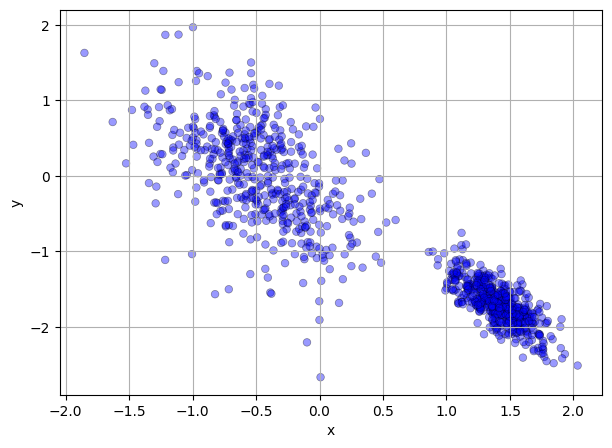

In [ ]:
plot_df_samples(df_shuffled)

In [ ]:
# save dataset to CSV file
df_shuffled.to_csv('ML_case_5_dataframe.csv', index=False)

> let's clear DF variables and upload CSV data

In [ ]:
df_shuffled = []
df_shuffled = pd.read_csv('ML_case_5_dataframe.csv', index_col=False)
df_shuffled.head(7)

Column1_feature  Column2_feature  Column3_target
0        45.044636       -10.091356             1.0
1       -25.999180         2.617501             1.0
2       -24.659467         2.997485             1.0
3        51.256844       -10.306610             1.0
4       -35.283820         0.481494             1.0
5        49.295765       -12.475070             1.0
6       -25.030399         2.887658             1.0

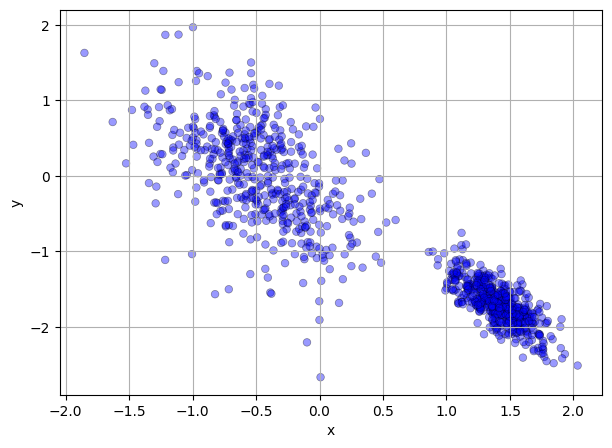

In [ ]:
plot_df_samples(df_shuffled)

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# You will need to tune eps and min_samples for your specific data.
# Try different combinations to find clusters that match your intuition or domain knowledge.
# Start with default or heuristic-based guesses.

eps_value = 0.3       # Radius of neighborhood
min_samples_value = 5 # Minimum number of points in eps-neighborhood

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
cluster_labels_dbscan = dbscan.fit_predict(X_scaled) # Use scaled data

# Number of clusters (excluding noise if present, labeled as -1)
n_clusters_ = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
# Number of noise points
n_noise_ = list(cluster_labels_dbscan).count(-1)

print(f"DBSCAN Parameters Used: eps={eps_value}, min_samples={min_samples_value}")
print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")


DBSCAN Parameters Used: eps=0.3, min_samples=5
Estimated number of clusters: 2
Estimated number of noise points: 9


In [ ]:
        XY_label = np.array(XY_label)

        # Adjust labels for metrics if necessary (e.g., if DBSCAN finds more/fewer groups)
        # Metrics like ARI and AMI handle different numbers of clusters well.
        # Avoid NMI if cluster numbers differ significantly or contain many singletons.

        # Adjust labels so noise (-1) gets its own category for evaluation if needed,
        # but usually, we compare found clusters vs true labels directly.
        # For simplicity here, we compare as-is. Noise points (-1) will contribute to dissimilarity.

        # --- Metrics ---
        # Rand Index and Adjusted Rand Index
        ri_score = metrics.rand_score(XY_label, cluster_labels_dbscan)
        ari_score = metrics.adjusted_rand_score(XY_label, cluster_labels_dbscan)

        # Normalized Mutual Information (can be less reliable if cluster numbers vary much)
        nmi_score = metrics.normalized_mutual_info_score(XY_label, cluster_labels_dbscan)

        # Homogeneity, Completeness, V-measure
        homogeneity = metrics.homogeneity_score(XY_label, cluster_labels_dbscan)
        completeness = metrics.completeness_score(XY_label, cluster_labels_dbscan)
        v_measure = metrics.v_measure_score(XY_label, cluster_labels_dbscan)

        # Adjusted Mutual Information
        ami_score = metrics.adjusted_mutual_info_score(XY_label, cluster_labels_dbscan)

        print("\n--- Clustering Evaluation Metrics (compared to known labels) ---")
        print(f"Rand Index (RI): {ri_score:.4f}")
        print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
        print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")
        print(f"Homogeneity: {homogeneity:.4f}")
        print(f"Completeness: {completeness:.4f}")
        print(f"V-measure: {v_measure:.4f}")
        print(f"Adjusted Mutual Information (AMI): {ami_score:.4f}")

        # --- Silhouette Score (requires at least 2 clusters and not all noise) ---
        if n_clusters_ >= 2 and n_noise_ < len(X_scaled):
            # Calculate silhouette score only for core samples to avoid issues with noise
            core_samples_mask = np.zeros_like(cluster_labels_dbscan, dtype=bool)
            core_samples_mask[dbscan.core_sample_indices_] = True
            core_cluster_labels = cluster_labels_dbscan[core_samples_mask]

            if len(np.unique(core_cluster_labels)) > 1: # Check unique labels in core samples
                 silhouette_avg = metrics.silhouette_score(X_scaled[core_samples_mask], core_cluster_labels)
                 print(f"Average Silhouette Score (Core Samples): {silhouette_avg:.4f}")
            else:
                 print("Silhouette Score: Not calculable (insufficient unique core cluster labels)")

        else:
             print("Silhouette Score: Not calculated (insufficient clusters or too much noise)")





--- Clustering Evaluation Metrics (compared to known labels) ---
Rand Index (RI): 0.4906
Adjusted Rand Index (ARI): 0.0000
Normalized Mutual Information (NMI): 0.0000
Homogeneity: 1.0000
Completeness: 0.0000
V-measure: 0.0000
Adjusted Mutual Information (AMI): 0.0000
Average Silhouette Score (Core Samples): 0.7382


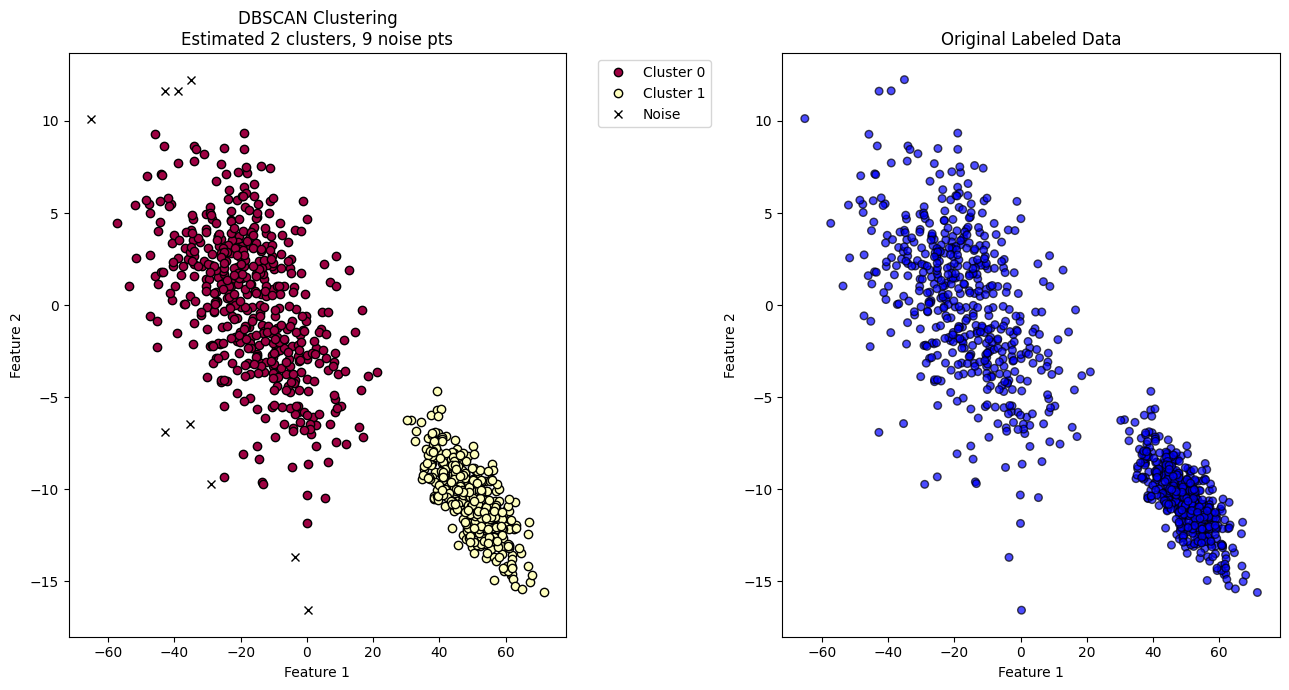

In [ ]:
# --- Visualization ---
# Determine unique labels found by DBSCAN (including -1 for noise)
unique_labels_dbscan = set(cluster_labels_dbscan)
n_clusters_found = len(unique_labels_dbscan) - (1 if -1 in unique_labels_dbscan else 0)

# Define colors for plotting (handle potential many clusters)
colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_dbscan)))

# Create a new figure for DBSCAN results
plt.figure(figsize=(13, 7))

# Plot 1: DBSCAN Results
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
for k, col in zip(unique_labels_dbscan, colors_dbscan):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        marker = 'x'
        label = 'Noise'
    else:
        marker = 'o'
        label = f'Cluster {k}'

    class_member_mask = (cluster_labels_dbscan == k)

    xy = X[class_member_mask] # Use original X for plotting positions if preferred, or X_scaled
    plt.plot(xy[:, 0], xy[:, 1], marker, markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label=label)

plt.title(f'DBSCAN Clustering\nEstimated {n_clusters_} clusters, {n_noise_} noise pts')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Consider legend if not too many clusters
if n_clusters_found <= 10: # Arbitrary threshold
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Original Labeled Data (for comparison)
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
# Assuming Cy contains the original labels (0 and 1 in your example)
colors_original = ['red', 'blue'] # Match colors to your original plot logic if possible
# Use the existing function if available and compatible, otherwise manual plot
# plot_df_samples(df_shuffled) # If df_shuffled exists and is structured correctly
# Otherwise, assuming X and Cy are available:
Cy_colors_map = [colors_original[int(label)] if label in [0, 1] else 'gray' for label in XY_label]
plt.scatter(X[:, 0], X[:, 1], c=Cy_colors_map, s=30, edgecolors='k', alpha=0.7)
plt.title('Original Labeled Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout() # Adjust subplots to prevent overlap
plt.show()



## One-class SVM

In [ ]:
from sklearn.svm import OneClassSVM

Total points: 1000
Normal points detected: 900
Anomalies detected: 100
Percentage of anomalies: 10.00%


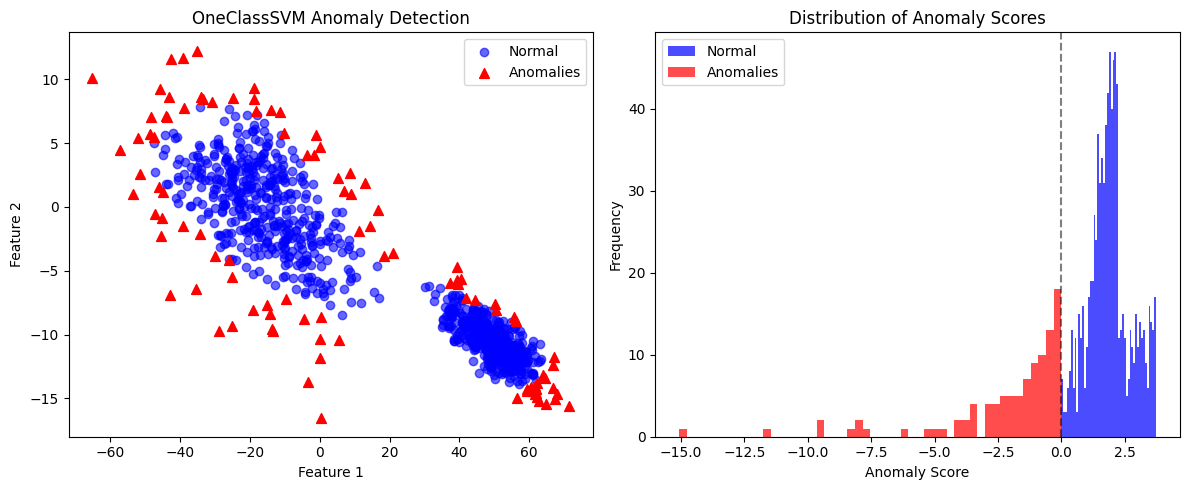


Validation examples:
Point [1. 1.]: Prediction = 1, Score = 0.543
Point [10. -5.]: Prediction = 1, Score = 1.449


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit OneClassSVM
# nu: parameter for controlling outlier fraction (0.1 means ~10% outliers)
# kernel: type of kernel ('rbf' is most common)
# gamma: kernel coefficient (higher values for more complex decision boundaries)
clf = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
clf.fit(X_scaled)

# Predict anomalies (-1 for anomaly, 1 for normal)
predictions = clf.predict(X_scaled)
anomaly_scores = clf.decision_function(X_scaled)  # Distance from boundary

# Separate normal and anomalous points
normal_points = X[predictions == 1]
anomalous_points = X[predictions == -1]

print(f"Total points: {len(X)}")
print(f"Normal points detected: {len(normal_points)}")
print(f"Anomalies detected: {len(anomalous_points)}")
print(f"Percentage of anomalies: {len(anomalous_points)/len(X)*100:.2f}%")

# Visualize results
plt.figure(figsize=(12, 5))

# Plot 1: All data with anomaly predictions
plt.subplot(1, 2, 1)
plt.scatter(normal_points[:, 0], normal_points[:, 1],
           c='blue', marker='o', label='Normal', alpha=0.6)
plt.scatter(anomalous_points[:, 0], anomalous_points[:, 1],
           c='red', marker='^', label='Anomalies', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('OneClassSVM Anomaly Detection')
plt.legend()

# Plot 2: Decision function scores
plt.subplot(1, 2, 2)
plt.hist(anomaly_scores[predictions == 1], bins=50, alpha=0.7, label='Normal', color='blue')
plt.hist(anomaly_scores[predictions == -1], bins=50, alpha=0.7, label='Anomalies', color='red')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)  # Decision boundary

plt.tight_layout()
plt.show()

# Example of validating new data points
print("\nValidation examples:")
# New normal point
new_normal_point = np.array([[1.0, 1.0]])
new_normal_scaled = scaler.transform(new_normal_point)
prediction_normal = clf.predict(new_normal_scaled)
score_normal = clf.decision_function(new_normal_scaled)
print(f"Point {new_normal_point[0]}: Prediction = {prediction_normal[0]}, Score = {score_normal[0]:.3f}")

# New anomalous point
new_anomaly_point = np.array([[10.0, -5.0]])
new_anomaly_scaled = scaler.transform(new_anomaly_point)
prediction_anomaly = clf.predict(new_anomaly_scaled)
score_anomaly = clf.decision_function(new_anomaly_scaled)
print(f"Point {new_anomaly_point[0]}: Prediction = {prediction_anomaly[0]}, Score = {score_anomaly[0]:.3f}")

## Agglomerative clustering

In [ ]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import seaborn as sns


Text(0, 0.5, 'Feature 2')

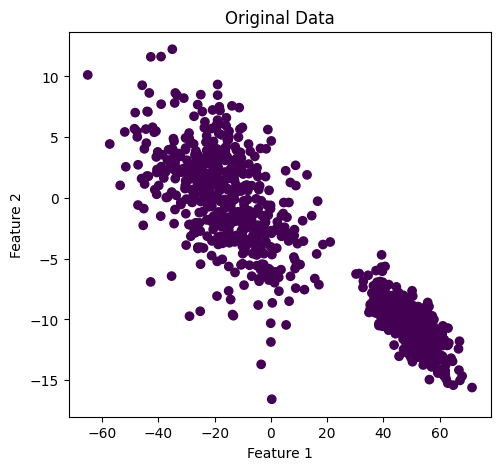

In [ ]:
# Visualize the original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=XY_label)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Silhouette Score (ward linkage): 0.387


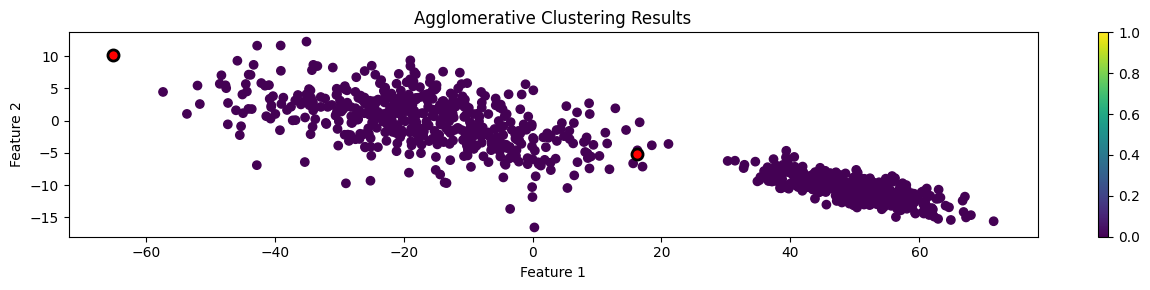

In [ ]:
# You can adjust parameters based on your needs:
# - n_clusters: Number of clusters to find
# - linkage: 'ward', 'complete', 'average', or 'single'
# - affinity: Distance metric ('euclidean', 'manhattan', etc.)

# Example 1: Basic agglomerative clustering with 3 clusters
agg_clustering = AgglomerativeClustering(
    n_clusters=2,           # Number of clusters
    linkage='single',         # Linkage criterion
    metric='euclidean'   # Distance metric (ignored for ward linkage)
)

# Fit the model and predict cluster labels
cluster_labels = agg_clustering.fit_predict(X)

# Calculate silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score (ward linkage): {silhouette_avg:.3f}")

# Visualize the clustering results
#plt.subplot(1, 2, 2)
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter)

# Add cluster centers (computed as mean of points in each cluster)
unique_labels = np.unique(cluster_labels)
centers = []
for label in unique_labels:
    class_member_mask = (cluster_labels == label)
    center = X[class_member_mask].mean(axis=0)
    centers.append(center)
    plt.plot(center[0], center[1], 'ro', markersize=8, markerfacecolor='red',
             markeredgecolor='black', markeredgewidth=2)

plt.tight_layout()
plt.show()

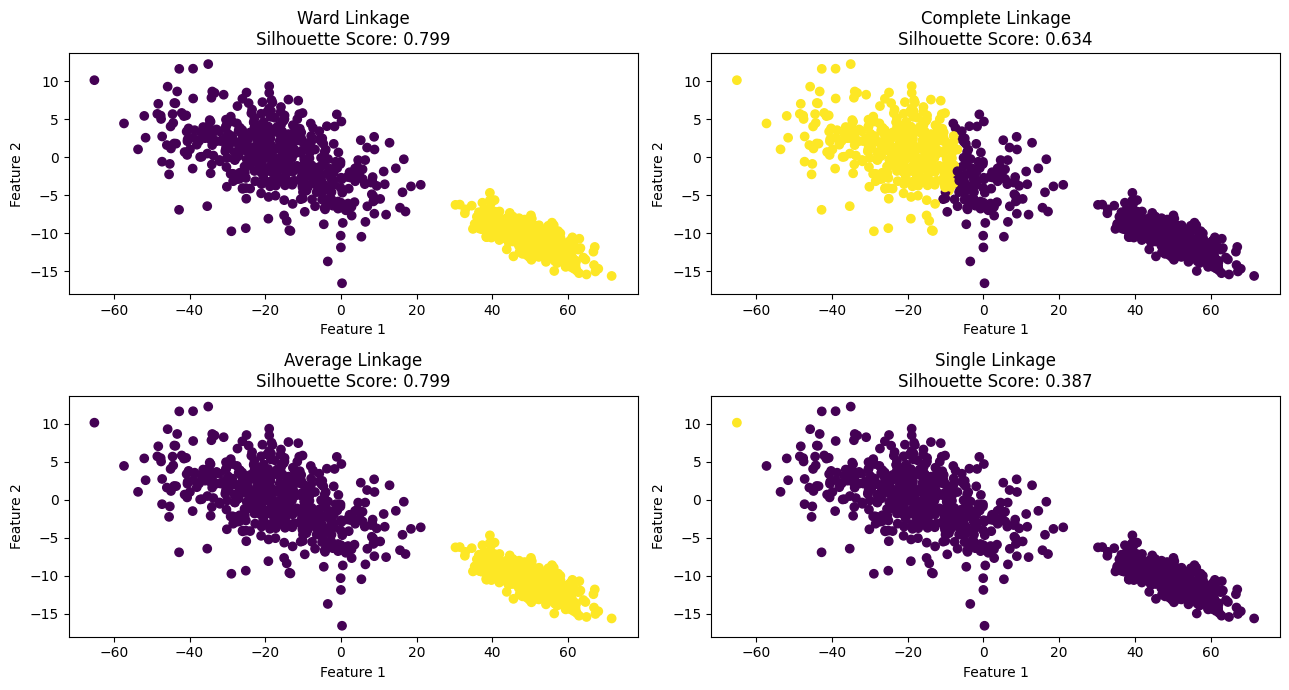

In [ ]:
# Example 2: Try different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(13, 7))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)

    # For single linkage, we can use other affinity metrics
    if method == 'single':
        agg_clustering = AgglomerativeClustering(
            n_clusters=2,
            linkage=method,
            metric='euclidean'
        )
    else:
        agg_clustering = AgglomerativeClustering(
            n_clusters=2,
            linkage=method,
            metric='euclidean'
        )

    labels = agg_clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(f'{method.capitalize()} Linkage\nSilhouette Score: {silhouette_avg:.3f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


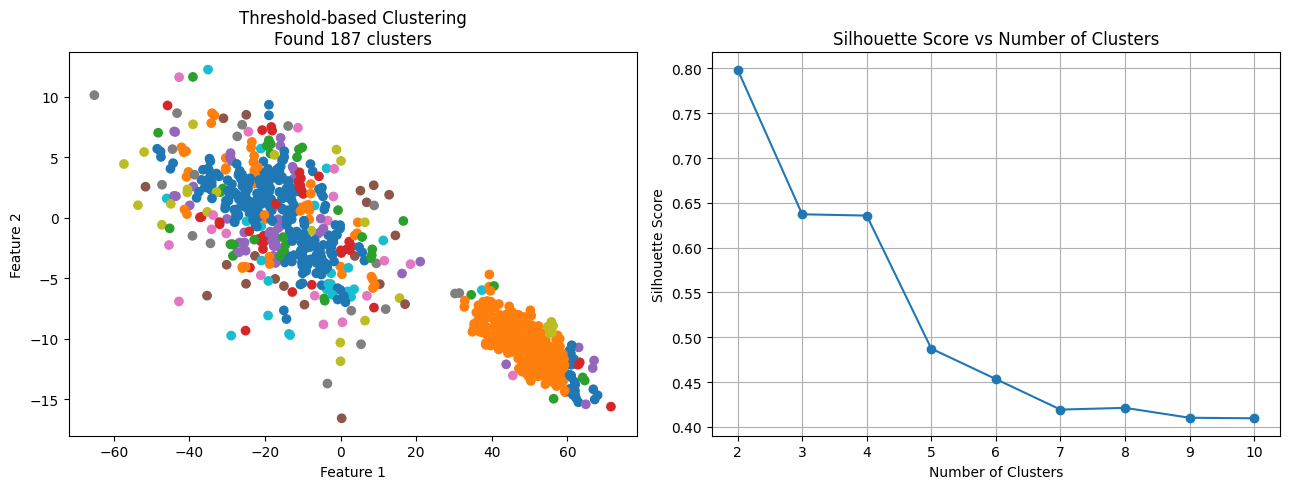


Best number of clusters: 2
Best silhouette score: 0.799


/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


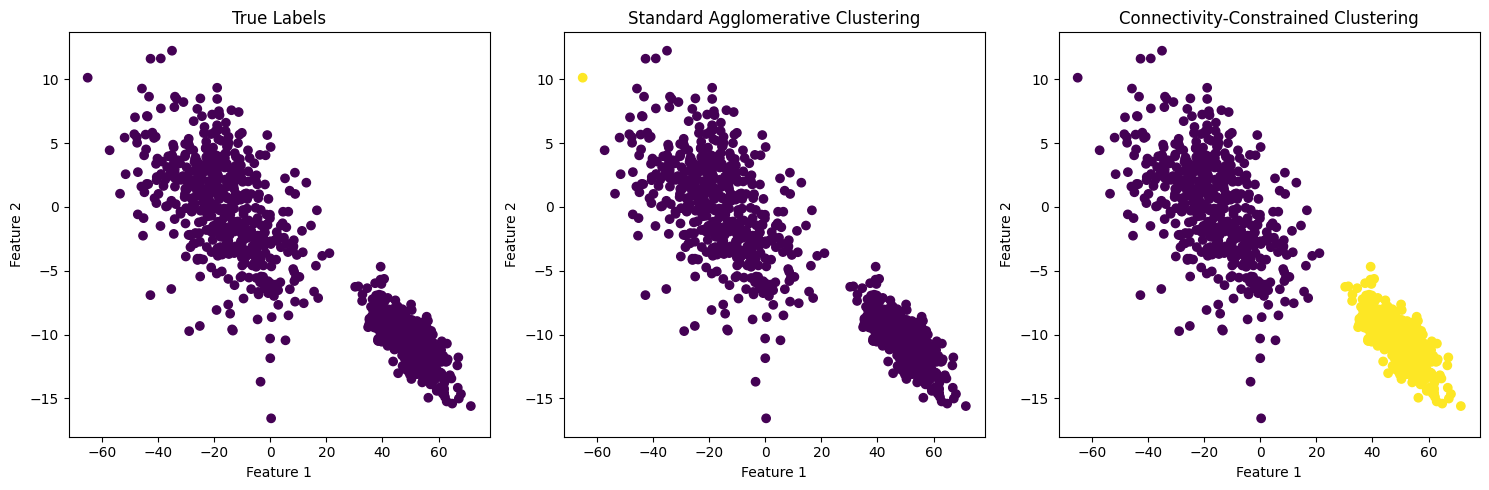

In [ ]:
# Agglomerative clustering without specifying number of clusters
# Using distance threshold to determine clusters
agg_clustering_threshold = AgglomerativeClustering(
    n_clusters=None,       # Must be None when using distance_threshold
    distance_threshold=1.0, # Linkage distance threshold
    linkage='single'
)

labels_threshold = agg_clustering_threshold.fit_predict(X)
n_clusters_found = len(np.unique(labels_threshold))

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_threshold, cmap='tab10')
plt.title(f'Threshold-based Clustering\nFound {n_clusters_found} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Example 4: Compare different numbers of clusters
n_cluster_range = range(2, 11)
silhouette_scores = []

for n in n_cluster_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = agg_clustering.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.subplot(1, 2, 2)
plt.plot(n_cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print information about the best clustering result
best_n_clusters = n_cluster_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\nBest number of clusters: {best_n_clusters}")
print(f"Best silhouette score: {best_score:.3f}")

# Example 5: Using custom connectivity matrix (for structured data)
from sklearn.neighbors import kneighbors_graph

# Create connectivity matrix (connect each point to its 5 nearest neighbors)
connectivity_matrix = kneighbors_graph(X, n_neighbors=5, include_self=False)

# Apply clustering with connectivity constraint
agg_clustering_connectivity = AgglomerativeClustering(
    n_clusters=2,
    connectivity=connectivity_matrix,
    linkage='ward'
)

labels_connectivity = agg_clustering_connectivity.fit_predict(X)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=XY_label, cmap='viridis')
plt.title('True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Standard Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels_connectivity, cmap='viridis')
plt.title('Connectivity-Constrained Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


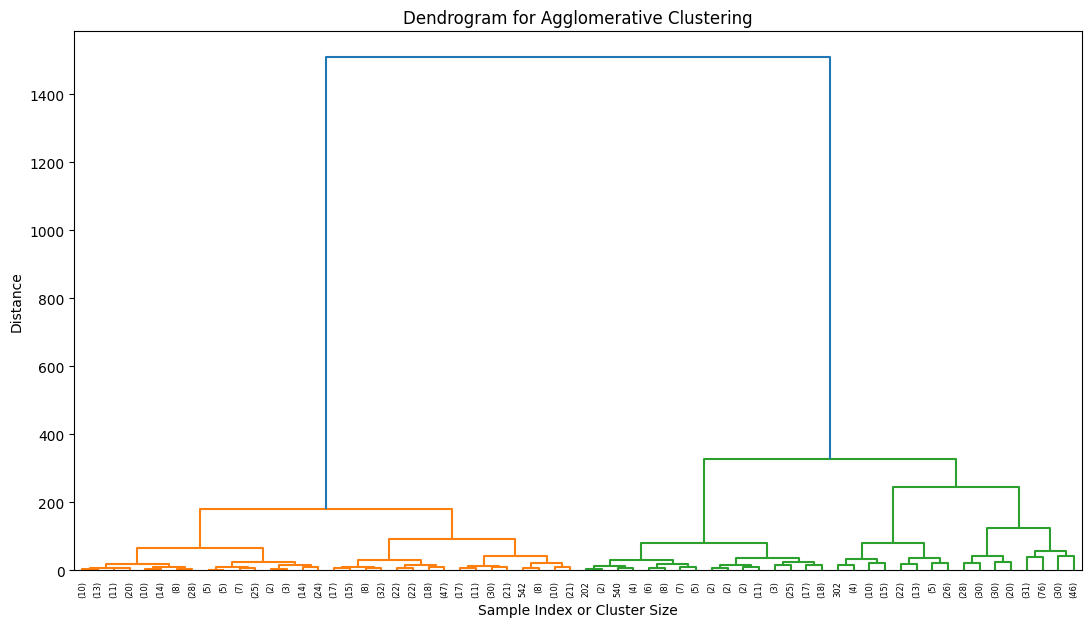

In [ ]:
# Example 6: Accessing the cluster hierarchy (linkage matrix)
# Note: Scikit-learn doesn't directly provide the linkage matrix
# But we can compute it using scipy if needed
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Compute linkage matrix using scipy
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(13, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

## K-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

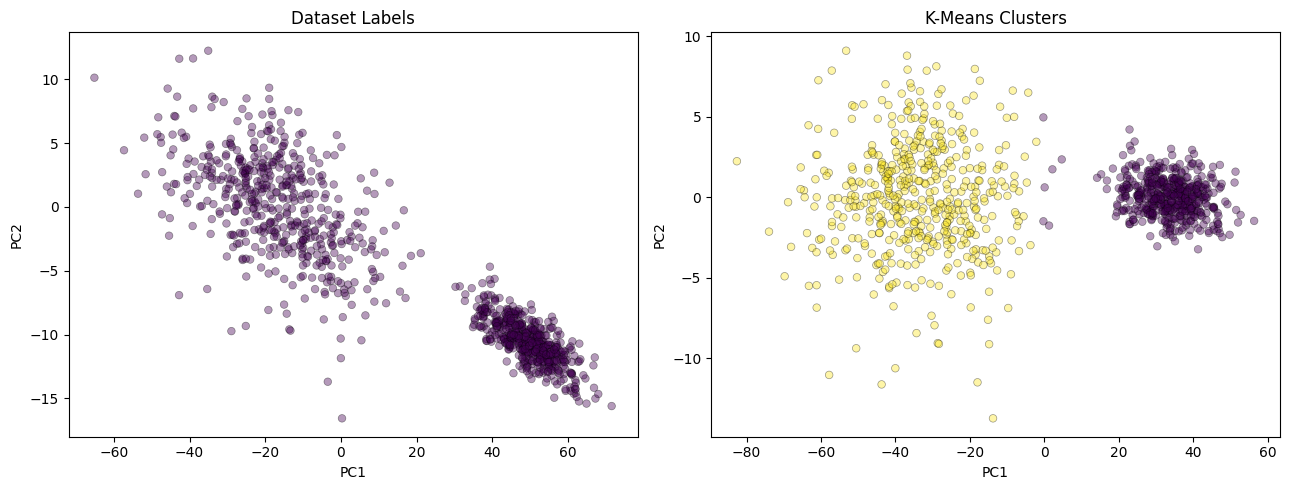

Cluster Centers:
Cluster 0: PC1 = 33.435, PC2 = 0.032
Cluster 1: PC1 = -34.110, PC2 = -0.033

Clustering Accuracy: 50.50%


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Plot the results
plt.figure(figsize=(13, 5))

# Plot 1: True labels
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=XY_label,
            cmap='viridis', s=30,
            alpha=0.4, edgecolors='k', linewidth=0.5
            )
plt.title("Dataset Labels")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot 2: K-means clusters
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels,
            cmap='viridis', s=30,
            alpha=0.4, edgecolors='k', linewidth=0.5
            )
plt.title("K-Means Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

# Print cluster centers
print("Cluster Centers:")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: PC1 = {center[0]:.3f}, PC2 = {center[1]:.3f}")

# Calculate accuracy of clustering vs true labels
# Since cluster labels might be flipped (0/1 swapped), we check both mappings
accuracy_01 = np.mean(cluster_labels == XY_label) * 100
accuracy_10 = np.mean(cluster_labels != XY_label) * 100
accuracy = max(accuracy_01, accuracy_10)

print(f"\nClustering Accuracy: {accuracy:.2f}%")

#Case 6: Overlay problem

## Generate Data and crate table CSV file

Let's generate two dimentional dataset. All samples will have two state (label) red or blue - it's a categorical statement.

A lot of ML task can be transform to "CSV tabel ML classification problem".

In [ ]:
# samples clearly separated and labeled.

# samples clearly separated and labeled. Generate core of dataset

import random
n_samples = 500

from scipy.stats import t

# Define parameters for the t-distribution
df = 3  # Degrees of freedom
loc = 0  # Location parameter (mean of the distribution)
scale = 2 # Scale parameter (related to standard deviation)

Ya = t.rvs(df=df, loc=loc+1, scale=scale*2, size=n_samples)
Yb = t.rvs(df=df, loc=loc-1, scale=scale, size=n_samples)
Cb = np.ones(n_samples) #label


Xa = np.random.normal(0,2,n_samples)
Xb = np.random.normal(0,20,n_samples)
Ca = np.zeros(n_samples) #label

A = np.hstack((Xa,Ya))
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

XY_label = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
#Rotation = np.array([[7, 1], [-1.5, 1]])  # Mixing matrix
#Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix
Rotation = np.array([[1, 0], [0, 1]])

X_mixed = np.dot(X, Rotation.T)  # Generate observations

X_true = X
X = X_mixed

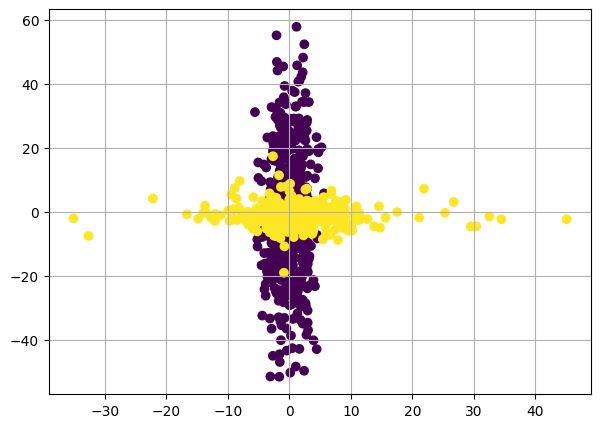

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1],c=XY_label)
plt.grid()

In [ ]:
# Create DATAFRAME with a dictionary where keys are column names and values are the arrays
data = {'Column1_feature': X[:,0], 'Column2_feature': X[:,1], 'Column3_target': XY_label}

# Create the DataFrame
df = pd.DataFrame(data)
df.head(10)

Column1_feature  Column2_feature  Column3_target
0        -0.254700         4.911209             0.0
1        -3.180872       -33.306096             0.0
2        -0.494785       -36.437355             0.0
3        -0.045138         8.990206             0.0
4        -4.542690       -16.654480             0.0
5        -1.650632       -51.520306             0.0
6        -0.976383         7.886732             0.0
7        -3.587548       -20.308227             0.0
8        -5.189921       -10.815759             0.0
9        -0.453207        -6.941679             0.0



> NOTE: all generated data strongly ordered! Let's shuffle



In [ ]:
# Shuffle the rows
df_shuffled = df.sample(frac=1).reset_index(drop=True)
print("\nShuffled DataFrame (original index retained):")
print(df_shuffled)


Shuffled DataFrame (original index retained):
     Column1_feature  Column2_feature  Column3_target
0          -2.704408       -44.971039             0.0
1         -12.158846        -0.688303             1.0
2          -0.326961       -10.908367             0.0
3          -2.105103        55.177925             0.0
4           3.254012        -0.561686             1.0
..               ...              ...             ...
995        -5.454286        -2.797785             1.0
996         1.113655         4.002616             0.0
997         1.301883         1.584859             1.0
998         2.157607        43.631103             0.0
999        -1.440807        19.797924             0.0

[1000 rows x 3 columns]


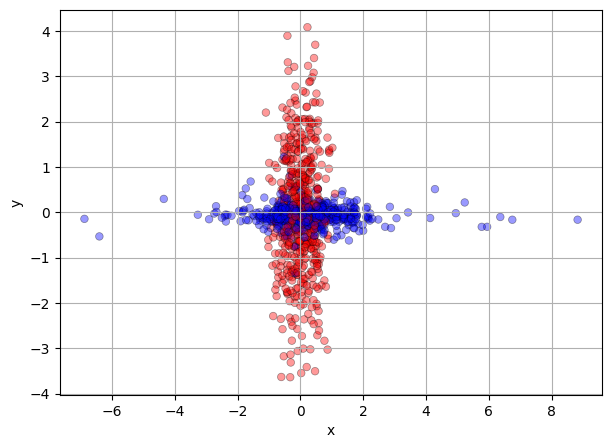

In [ ]:
plot_df_samples(df_shuffled)

In [ ]:
# save dataset to CSV file
df_shuffled.to_csv('ML_case_6_dataframe.csv', index=False)

> let's clear DF variables and upload CSV data

In [ ]:
df_shuffled = []
df_shuffled = pd.read_csv('ML_case_6_dataframe.csv', index_col=False)
df_shuffled.head(7)

Column1_feature  Column2_feature  Column3_target
0        -2.704408       -44.971039             0.0
1       -12.158846        -0.688303             1.0
2        -0.326961       -10.908367             0.0
3        -2.105103        55.177925             0.0
4         3.254012        -0.561686             1.0
5         3.686121        -0.482133             1.0
6        -3.861730        -1.914551             1.0

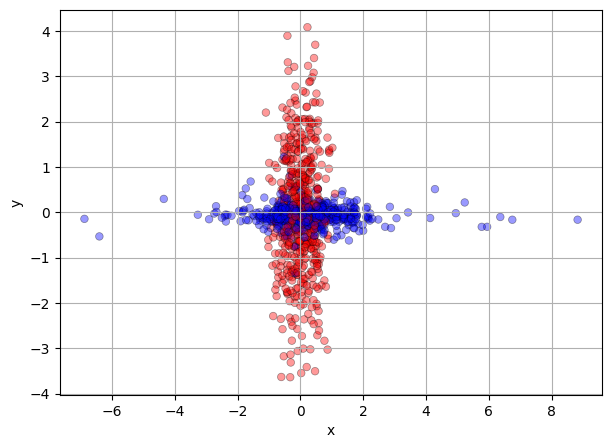

In [ ]:
plot_df_samples(df_shuffled)

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# You will need to tune eps and min_samples for your specific data.
# Try different combinations to find clusters that match your intuition or domain knowledge.
# Start with default or heuristic-based guesses.

eps_value = 0.3       # Radius of neighborhood
min_samples_value = 5 # Minimum number of points in eps-neighborhood

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
cluster_labels_dbscan = dbscan.fit_predict(X_scaled) # Use scaled data

# Number of clusters (excluding noise if present, labeled as -1)
n_clusters_ = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
# Number of noise points
n_noise_ = list(cluster_labels_dbscan).count(-1)

print(f"DBSCAN Parameters Used: eps={eps_value}, min_samples={min_samples_value}")
print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")


DBSCAN Parameters Used: eps=0.3, min_samples=5
Estimated number of clusters: 2
Estimated number of noise points: 42


In [ ]:
        XY_label = np.array(XY_label)

        # Adjust labels for metrics if necessary (e.g., if DBSCAN finds more/fewer groups)
        # Metrics like ARI and AMI handle different numbers of clusters well.
        # Avoid NMI if cluster numbers differ significantly or contain many singletons.

        # Adjust labels so noise (-1) gets its own category for evaluation if needed,
        # but usually, we compare found clusters vs true labels directly.
        # For simplicity here, we compare as-is. Noise points (-1) will contribute to dissimilarity.

        # --- Metrics ---
        # Rand Index and Adjusted Rand Index
        ri_score = metrics.rand_score(XY_label, cluster_labels_dbscan)
        ari_score = metrics.adjusted_rand_score(XY_label, cluster_labels_dbscan)

        # Normalized Mutual Information (can be less reliable if cluster numbers vary much)
        nmi_score = metrics.normalized_mutual_info_score(XY_label, cluster_labels_dbscan)

        # Homogeneity, Completeness, V-measure
        homogeneity = metrics.homogeneity_score(XY_label, cluster_labels_dbscan)
        completeness = metrics.completeness_score(XY_label, cluster_labels_dbscan)
        v_measure = metrics.v_measure_score(XY_label, cluster_labels_dbscan)

        # Adjusted Mutual Information
        ami_score = metrics.adjusted_mutual_info_score(XY_label, cluster_labels_dbscan)

        print("\n--- Clustering Evaluation Metrics (compared to known labels) ---")
        print(f"Rand Index (RI): {ri_score:.4f}")
        print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
        print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")
        print(f"Homogeneity: {homogeneity:.4f}")
        print(f"Completeness: {completeness:.4f}")
        print(f"V-measure: {v_measure:.4f}")
        print(f"Adjusted Mutual Information (AMI): {ami_score:.4f}")

        # --- Silhouette Score (requires at least 2 clusters and not all noise) ---
        if n_clusters_ >= 2 and n_noise_ < len(X_scaled):
            # Calculate silhouette score only for core samples to avoid issues with noise
            core_samples_mask = np.zeros_like(cluster_labels_dbscan, dtype=bool)
            core_samples_mask[dbscan.core_sample_indices_] = True
            core_cluster_labels = cluster_labels_dbscan[core_samples_mask]

            if len(np.unique(core_cluster_labels)) > 1: # Check unique labels in core samples
                 silhouette_avg = metrics.silhouette_score(X_scaled[core_samples_mask], core_cluster_labels)
                 print(f"Average Silhouette Score (Core Samples): {silhouette_avg:.4f}")
            else:
                 print("Silhouette Score: Not calculable (insufficient unique core cluster labels)")

        else:
             print("Silhouette Score: Not calculated (insufficient clusters or too much noise)")





--- Clustering Evaluation Metrics (compared to known labels) ---
Rand Index (RI): 0.4998
Adjusted Rand Index (ARI): 0.0003
Normalized Mutual Information (NMI): 0.0118
Homogeneity: 0.0077
Completeness: 0.0249
V-measure: 0.0118
Adjusted Mutual Information (AMI): 0.0095
Average Silhouette Score (Core Samples): 0.5308


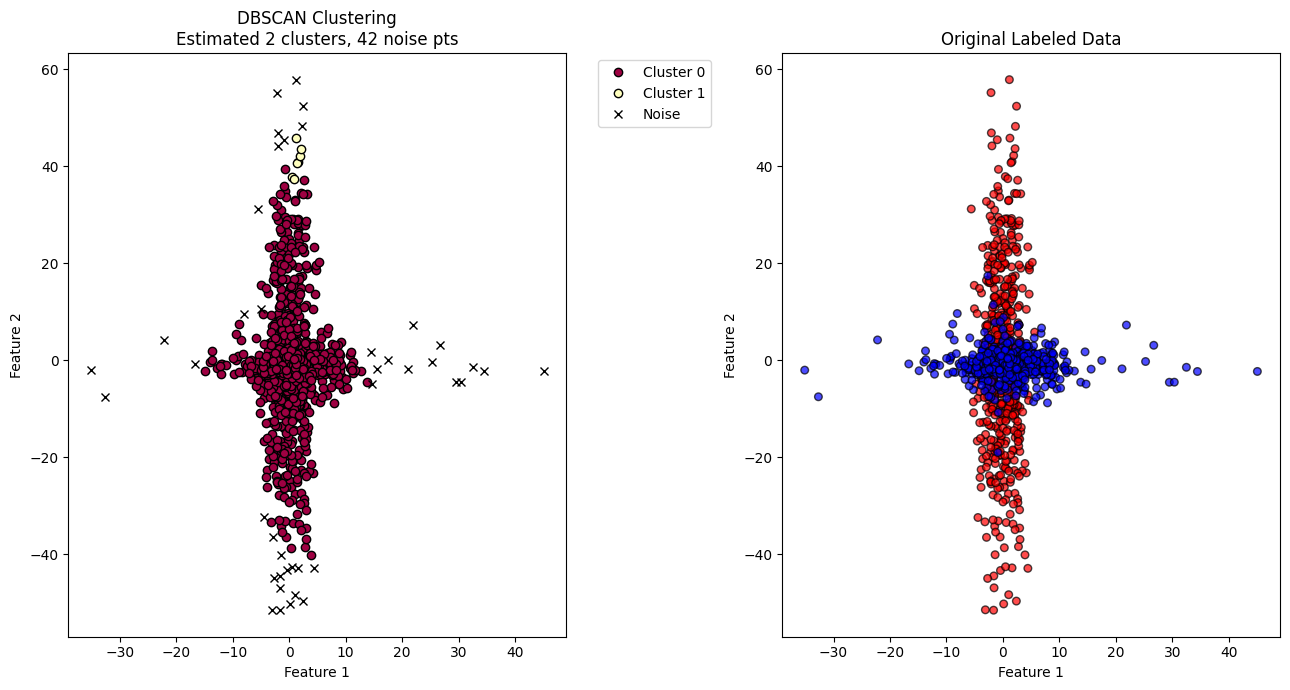

In [ ]:
# --- Visualization ---
# Determine unique labels found by DBSCAN (including -1 for noise)
unique_labels_dbscan = set(cluster_labels_dbscan)
n_clusters_found = len(unique_labels_dbscan) - (1 if -1 in unique_labels_dbscan else 0)

# Define colors for plotting (handle potential many clusters)
colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_dbscan)))

# Create a new figure for DBSCAN results
plt.figure(figsize=(13, 7))

# Plot 1: DBSCAN Results
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
for k, col in zip(unique_labels_dbscan, colors_dbscan):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        marker = 'x'
        label = 'Noise'
    else:
        marker = 'o'
        label = f'Cluster {k}'

    class_member_mask = (cluster_labels_dbscan == k)

    xy = X[class_member_mask] # Use original X for plotting positions if preferred, or X_scaled
    plt.plot(xy[:, 0], xy[:, 1], marker, markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label=label)

plt.title(f'DBSCAN Clustering\nEstimated {n_clusters_} clusters, {n_noise_} noise pts')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Consider legend if not too many clusters
if n_clusters_found <= 10: # Arbitrary threshold
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Original Labeled Data (for comparison)
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
# Assuming Cy contains the original labels (0 and 1 in your example)
colors_original = ['red', 'blue'] # Match colors to your original plot logic if possible
# Use the existing function if available and compatible, otherwise manual plot
# plot_df_samples(df_shuffled) # If df_shuffled exists and is structured correctly
# Otherwise, assuming X and Cy are available:
Cy_colors_map = [colors_original[int(label)] if label in [0, 1] else 'gray' for label in XY_label]
plt.scatter(X[:, 0], X[:, 1], c=Cy_colors_map, s=30, edgecolors='k', alpha=0.7)
plt.title('Original Labeled Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout() # Adjust subplots to prevent overlap
plt.show()



## One-class SVM

In [ ]:
from sklearn.svm import OneClassSVM


Total points: 1000
Normal points detected: 899
Anomalies detected: 101
Percentage of anomalies: 10.10%


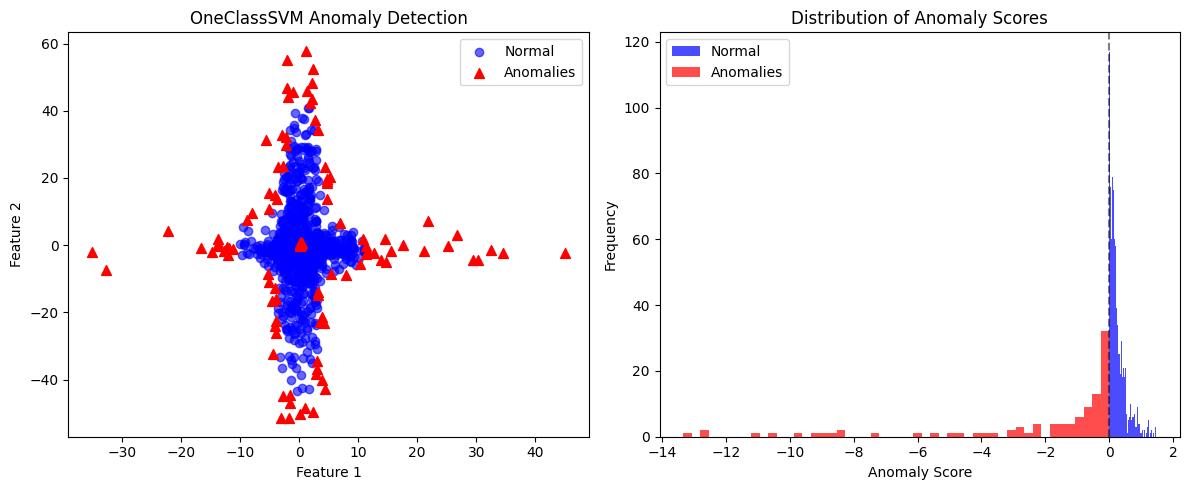


Validation examples:
Point [1. 1.]: Prediction = 1, Score = 0.013
Point [10. -5.]: Prediction = 1, Score = 0.066


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit OneClassSVM
# nu: parameter for controlling outlier fraction (0.1 means ~10% outliers)
# kernel: type of kernel ('rbf' is most common)
# gamma: kernel coefficient (higher values for more complex decision boundaries)
clf = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
clf.fit(X_scaled)

# Predict anomalies (-1 for anomaly, 1 for normal)
predictions = clf.predict(X_scaled)
anomaly_scores = clf.decision_function(X_scaled)  # Distance from boundary

# Separate normal and anomalous points
normal_points = X[predictions == 1]
anomalous_points = X[predictions == -1]

print(f"Total points: {len(X)}")
print(f"Normal points detected: {len(normal_points)}")
print(f"Anomalies detected: {len(anomalous_points)}")
print(f"Percentage of anomalies: {len(anomalous_points)/len(X)*100:.2f}%")

# Visualize results
plt.figure(figsize=(12, 5))

# Plot 1: All data with anomaly predictions
plt.subplot(1, 2, 1)
plt.scatter(normal_points[:, 0], normal_points[:, 1],
           c='blue', marker='o', label='Normal', alpha=0.6)
plt.scatter(anomalous_points[:, 0], anomalous_points[:, 1],
           c='red', marker='^', label='Anomalies', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('OneClassSVM Anomaly Detection')
plt.legend()

# Plot 2: Decision function scores
plt.subplot(1, 2, 2)
plt.hist(anomaly_scores[predictions == 1], bins=50, alpha=0.7, label='Normal', color='blue')
plt.hist(anomaly_scores[predictions == -1], bins=50, alpha=0.7, label='Anomalies', color='red')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)  # Decision boundary

plt.tight_layout()
plt.show()

# Example of validating new data points
print("\nValidation examples:")
# New normal point
new_normal_point = np.array([[1.0, 1.0]])
new_normal_scaled = scaler.transform(new_normal_point)
prediction_normal = clf.predict(new_normal_scaled)
score_normal = clf.decision_function(new_normal_scaled)
print(f"Point {new_normal_point[0]}: Prediction = {prediction_normal[0]}, Score = {score_normal[0]:.3f}")

# New anomalous point
new_anomaly_point = np.array([[10.0, -5.0]])
new_anomaly_scaled = scaler.transform(new_anomaly_point)
prediction_anomaly = clf.predict(new_anomaly_scaled)
score_anomaly = clf.decision_function(new_anomaly_scaled)
print(f"Point {new_anomaly_point[0]}: Prediction = {prediction_anomaly[0]}, Score = {score_anomaly[0]:.3f}")

## Agglomerative clustering

In [ ]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import seaborn as sns


Text(0, 0.5, 'Feature 2')

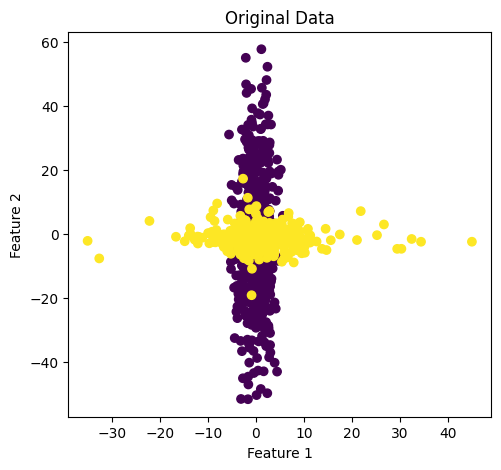

In [ ]:
# Visualize the original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=XY_label)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Silhouette Score (ward linkage): 0.567


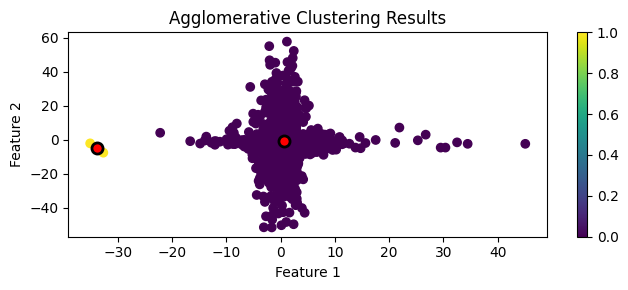

In [ ]:
# You can adjust parameters based on your needs:
# - n_clusters: Number of clusters to find
# - linkage: 'ward', 'complete', 'average', or 'single'
# - affinity: Distance metric ('euclidean', 'manhattan', etc.)

# Example 1: Basic agglomerative clustering with 3 clusters
agg_clustering = AgglomerativeClustering(
    n_clusters=2,           # Number of clusters
    linkage='single',         # Linkage criterion
    metric='euclidean'   # Distance metric (ignored for ward linkage)
)

# Fit the model and predict cluster labels
cluster_labels = agg_clustering.fit_predict(X)

# Calculate silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score (ward linkage): {silhouette_avg:.3f}")

# Visualize the clustering results
plt.subplot(1, 2, 2)
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter)

# Add cluster centers (computed as mean of points in each cluster)
unique_labels = np.unique(cluster_labels)
centers = []
for label in unique_labels:
    class_member_mask = (cluster_labels == label)
    center = X[class_member_mask].mean(axis=0)
    centers.append(center)
    plt.plot(center[0], center[1], 'ro', markersize=8, markerfacecolor='red',
             markeredgecolor='black', markeredgewidth=2)

plt.tight_layout()
plt.show()

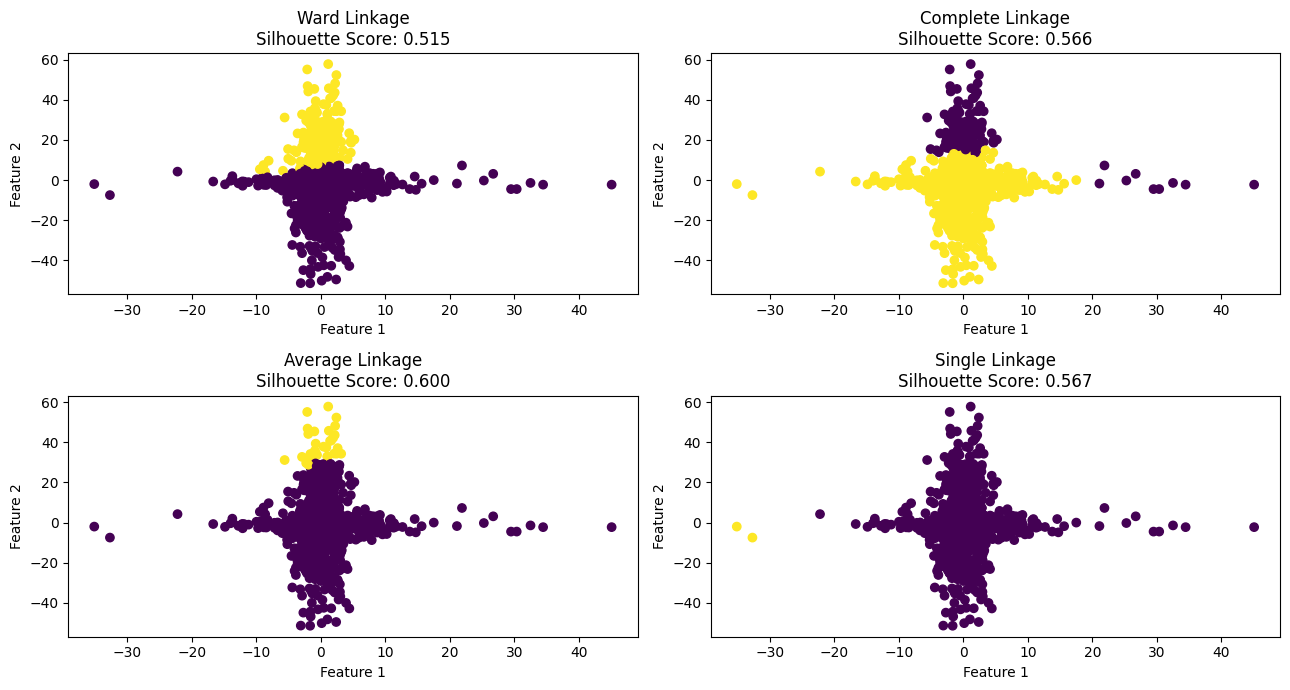

In [ ]:
# Example 2: Try different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(13, 7))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)

    # For single linkage, we can use other affinity metrics
    if method == 'single':
        agg_clustering = AgglomerativeClustering(
            n_clusters=2,
            linkage=method,
            metric='euclidean'
        )
    else:
        agg_clustering = AgglomerativeClustering(
            n_clusters=2,
            linkage=method,
            metric='euclidean'
        )

    labels = agg_clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(f'{method.capitalize()} Linkage\nSilhouette Score: {silhouette_avg:.3f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


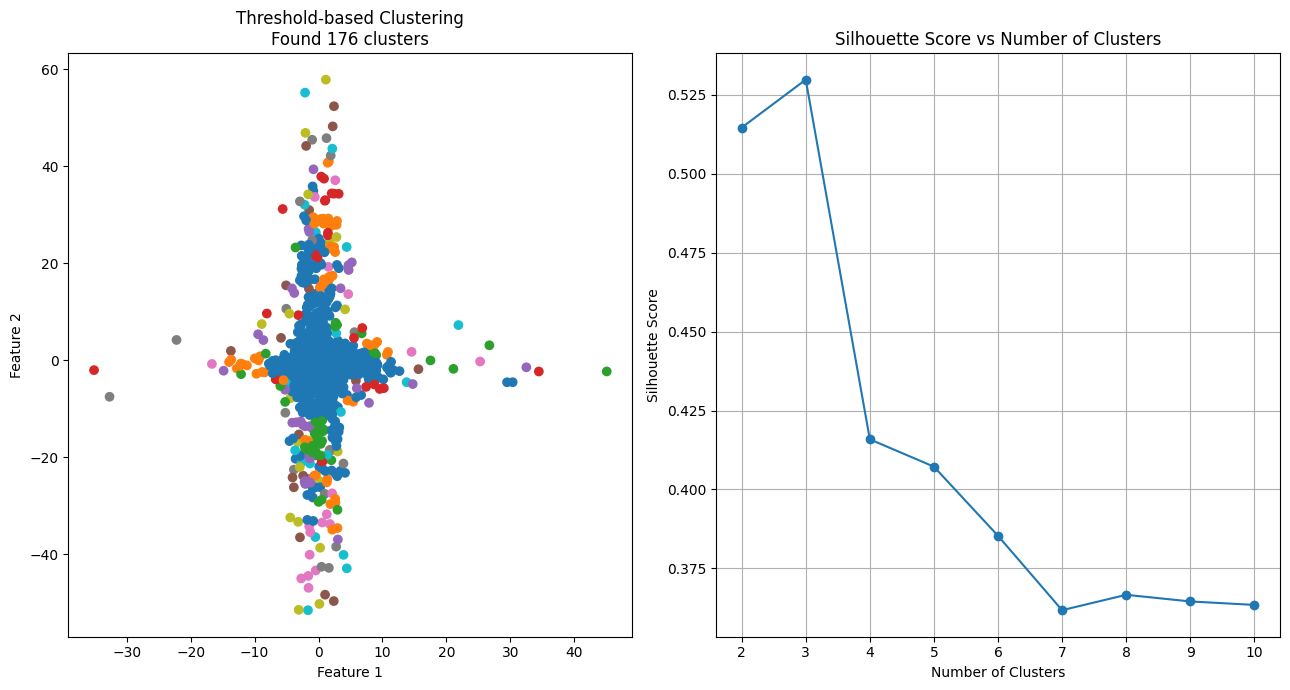


Best number of clusters: 3
Best silhouette score: 0.530


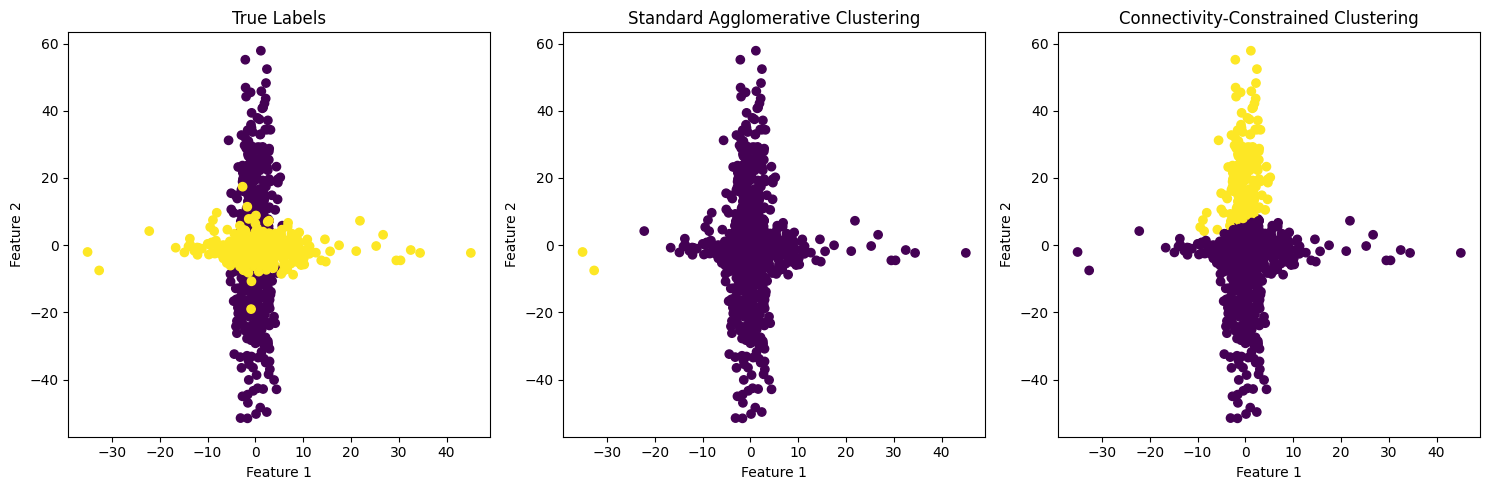

In [ ]:
# Agglomerative clustering without specifying number of clusters
# Using distance threshold to determine clusters
agg_clustering_threshold = AgglomerativeClustering(
    n_clusters=None,       # Must be None when using distance_threshold
    distance_threshold=1.0, # Linkage distance threshold
    linkage='single'
)

labels_threshold = agg_clustering_threshold.fit_predict(X)
n_clusters_found = len(np.unique(labels_threshold))

plt.figure(figsize=(13, 7))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_threshold, cmap='tab10')
plt.title(f'Threshold-based Clustering\nFound {n_clusters_found} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Example 4: Compare different numbers of clusters
n_cluster_range = range(2, 11)
silhouette_scores = []

for n in n_cluster_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = agg_clustering.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.subplot(1, 2, 2)
plt.plot(n_cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print information about the best clustering result
best_n_clusters = n_cluster_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\nBest number of clusters: {best_n_clusters}")
print(f"Best silhouette score: {best_score:.3f}")

# Example 5: Using custom connectivity matrix (for structured data)
from sklearn.neighbors import kneighbors_graph

# Create connectivity matrix (connect each point to its 5 nearest neighbors)
connectivity_matrix = kneighbors_graph(X, n_neighbors=5, include_self=False)

# Apply clustering with connectivity constraint
agg_clustering_connectivity = AgglomerativeClustering(
    n_clusters=2,
    connectivity=connectivity_matrix,
    linkage='ward'
)

labels_connectivity = agg_clustering_connectivity.fit_predict(X)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=XY_label, cmap='viridis')
plt.title('True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Standard Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels_connectivity, cmap='viridis')
plt.title('Connectivity-Constrained Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


## SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

Accuracy: 0.5900


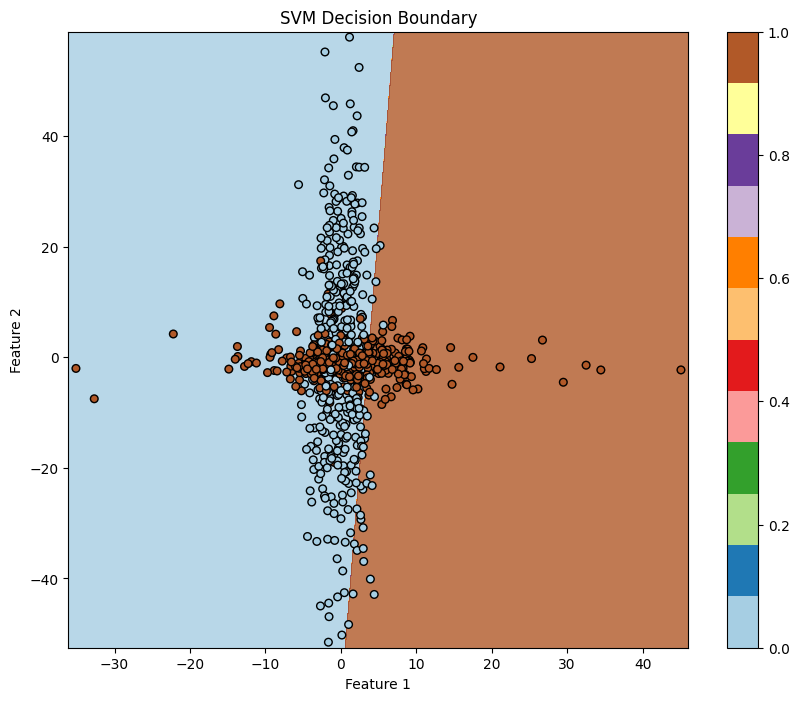


Number of support vectors: 754
Support vectors per class: [377 377]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, XY_label, test_size=0.2, random_state=42)

# Create an SVM classifier
# You can experiment with different kernels: 'linear', 'rbf', 'poly', 'sigmoid'
clf = svm.SVC(kernel='linear', C=1.0, gamma='scale')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


# Visualize the decision boundary (for 2D data)
plt.figure(figsize=(10, 8))
# Plot the data points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30)
plt.colorbar(scatter)

# Create a mesh to plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points again (to ensure they're visible)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

# Print support vectors information
print(f"\nNumber of support vectors: {len(clf.support_vectors_)}")
print(f"Support vectors per class: {clf.n_support_}")


Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.94      0.69        96
         1.0       0.82      0.27      0.41       104

    accuracy                           0.59       200
   macro avg       0.68      0.60      0.55       200
weighted avg       0.69      0.59      0.54       200



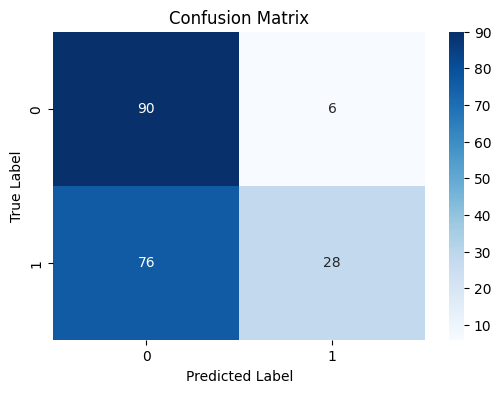

In [ ]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## One-class SVM

In [ ]:
from sklearn.svm import OneClassSVM


Total points: 1000
Normal points detected: 899
Anomalies detected: 101
Percentage of anomalies: 10.10%


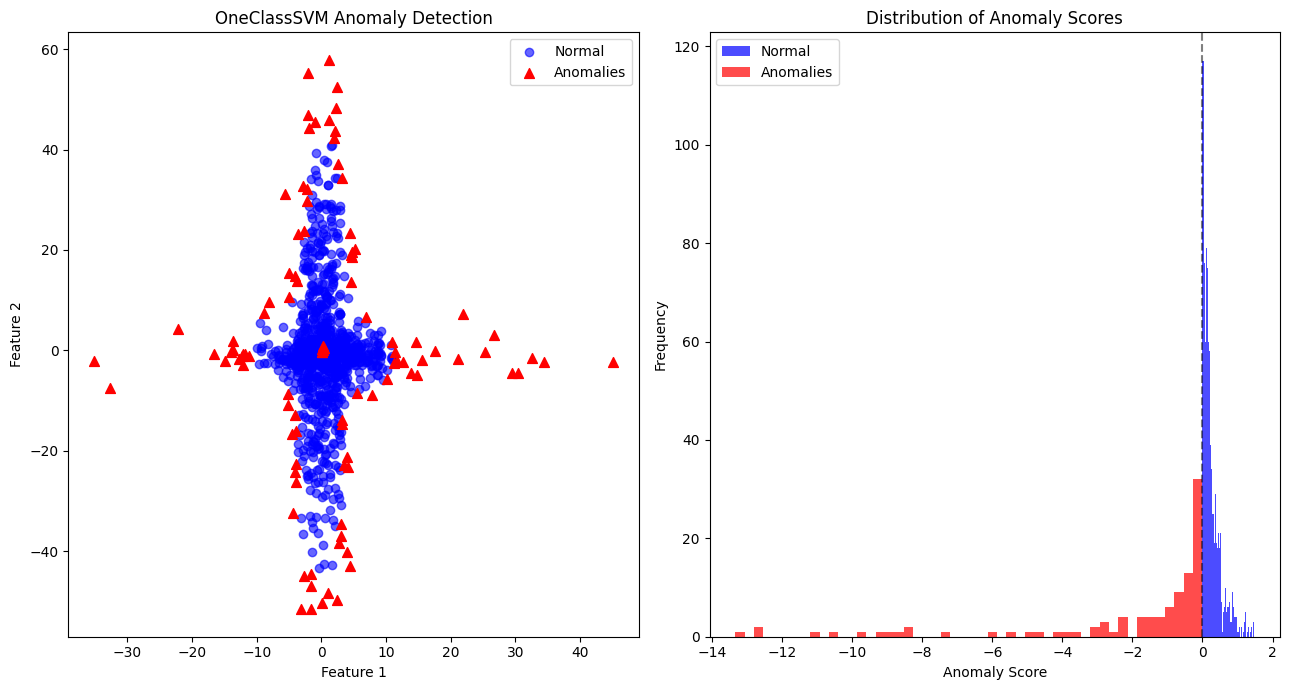


Validation examples:
Point [1. 1.]: Prediction = 1, Score = 0.013
Point [10. -5.]: Prediction = 1, Score = 0.066


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit OneClassSVM
# nu: parameter for controlling outlier fraction (0.1 means ~10% outliers)
# kernel: type of kernel ('rbf' is most common)
# gamma: kernel coefficient (higher values for more complex decision boundaries)
clf = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
clf.fit(X_scaled)

# Predict anomalies (-1 for anomaly, 1 for normal)
predictions = clf.predict(X_scaled)
anomaly_scores = clf.decision_function(X_scaled)  # Distance from boundary

# Separate normal and anomalous points
normal_points = X[predictions == 1]
anomalous_points = X[predictions == -1]

print(f"Total points: {len(X)}")
print(f"Normal points detected: {len(normal_points)}")
print(f"Anomalies detected: {len(anomalous_points)}")
print(f"Percentage of anomalies: {len(anomalous_points)/len(X)*100:.2f}%")

# Visualize results
plt.figure(figsize=(13, 7))

# Plot 1: All data with anomaly predictions
plt.subplot(1, 2, 1)
plt.scatter(normal_points[:, 0], normal_points[:, 1],
           c='blue', marker='o', label='Normal', alpha=0.6)
plt.scatter(anomalous_points[:, 0], anomalous_points[:, 1],
           c='red', marker='^', label='Anomalies', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('OneClassSVM Anomaly Detection')
plt.legend()

# Plot 2: Decision function scores
plt.subplot(1, 2, 2)
plt.hist(anomaly_scores[predictions == 1], bins=50, alpha=0.7, label='Normal', color='blue')
plt.hist(anomaly_scores[predictions == -1], bins=50, alpha=0.7, label='Anomalies', color='red')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)  # Decision boundary

plt.tight_layout()
plt.show()

# Example of validating new data points
print("\nValidation examples:")
# New normal point
new_normal_point = np.array([[1.0, 1.0]])
new_normal_scaled = scaler.transform(new_normal_point)
prediction_normal = clf.predict(new_normal_scaled)
score_normal = clf.decision_function(new_normal_scaled)
print(f"Point {new_normal_point[0]}: Prediction = {prediction_normal[0]}, Score = {score_normal[0]:.3f}")

# New anomalous point
new_anomaly_point = np.array([[10.0, -5.0]])
new_anomaly_scaled = scaler.transform(new_anomaly_point)
prediction_anomaly = clf.predict(new_anomaly_scaled)
score_anomaly = clf.decision_function(new_anomaly_scaled)
print(f"Point {new_anomaly_point[0]}: Prediction = {prediction_anomaly[0]}, Score = {score_anomaly[0]:.3f}")

## SVМ with TSNE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


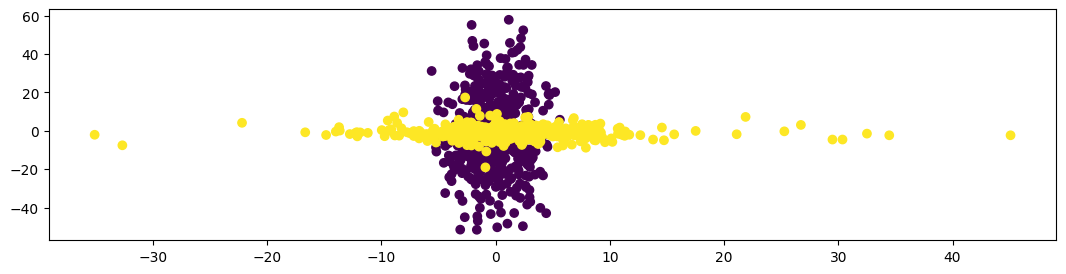

In [ ]:
plt.scatter(X[:, 0], X[:, 1],c=XY_label)

Tracking sample 1 with label: 0.0 (Class 0)
Tracking sample 0 with label: 1.0 (Class 1)
Applying t-SNE...
Accuracy with t-SNE + SVM: 0.8850


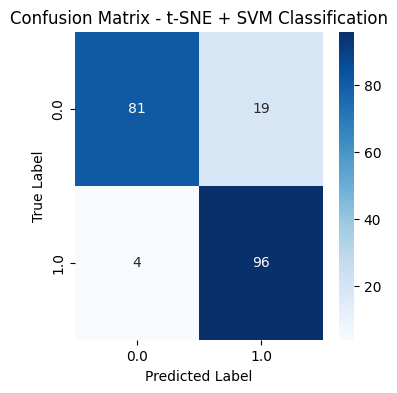


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.88       100
         1.0       0.83      0.96      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X/X.std(), XY_label, test_size=0.2, random_state=42, stratify=XY_label)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select TWO specific samples to track - one from each class (0 and 1)
# Find indices of samples with label 0 and label 1 in test set
label_0_indices = np.where(y_test == 0)[0]
label_1_indices = np.where(y_test == 1)[0]

if len(label_0_indices) > 0 and len(label_1_indices) > 0:
    sample_0_index = label_0_indices[0]  # First sample with label 0
    sample_1_index = label_1_indices[0]  # First sample with label 1

    sample_0_original = X_test_scaled[sample_0_index].reshape(1, -1)
    sample_1_original = X_test_scaled[sample_1_index].reshape(1, -1)

    sample_0_label = y_test.iloc[sample_0_index] if hasattr(y_test, 'iloc') else y_test[sample_0_index]
    sample_1_label = y_test.iloc[sample_1_index] if hasattr(y_test, 'iloc') else y_test[sample_1_index]

    print(f"Tracking sample {sample_0_index} with label: {sample_0_label} (Class 0)")
    print(f"Tracking sample {sample_1_index} with label: {sample_1_label} (Class 1)")
else:
    print("Not enough samples from both classes, using first two test samples")
    sample_0_index, sample_1_index = 0, 1
    sample_0_original = X_test_scaled[sample_0_index].reshape(1, -1)
    sample_1_original = X_test_scaled[sample_1_index].reshape(1, -1)
    sample_0_label = y_test.iloc[sample_0_index] if hasattr(y_test, 'iloc') else y_test[sample_0_index]
    sample_1_label = y_test.iloc[sample_1_index] if hasattr(y_test, 'iloc') else y_test[sample_1_index]

# Apply t-SNE for dimensionality reduction (fit on training data)
print("Applying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=7)

# For better visualization, let's create a combined dataset approach
# Combine train and test for consistent t-SNE mapping
X_combined = np.vstack([X_train_scaled, X_test_scaled])
combined_labels = np.concatenate([y_train, y_test])
is_test = np.concatenate([np.zeros(len(X_train_scaled)), np.ones(len(X_test_scaled))])

# Apply t-SNE to combined data
X_combined_tsne = tsne.fit_transform(X_combined)
#X_combined_tsne = tsne.fit_transform(X)

# Separate back into train and test
split_point = len(X_train_scaled)
X_train_tsne_final = X_combined_tsne[:split_point]
X_test_tsne_final = X_combined_tsne[split_point:]

# Get t-SNE coordinates for both samples
sample_0_tsne_coords = X_test_tsne_final[sample_0_index]
sample_1_tsne_coords = X_test_tsne_final[sample_1_index]

# Train a classifier on t-SNE reduced data
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train_tsne_final, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tsne_final)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with t-SNE + SVM: {accuracy:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(Cy), yticklabels=np.unique(Cy))
plt.title('Confusion Matrix - t-SNE + SVM Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



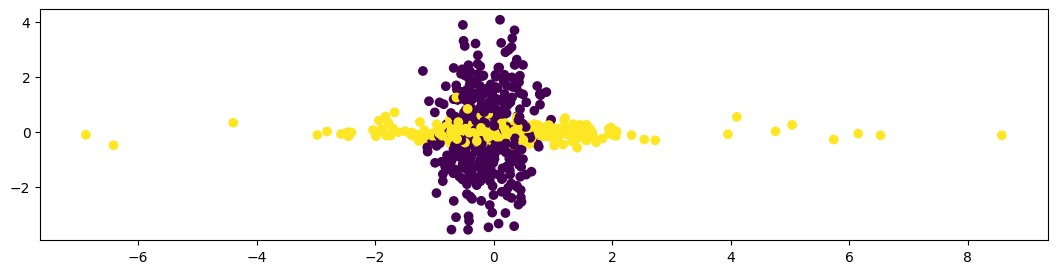

In [ ]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],c=y_train)

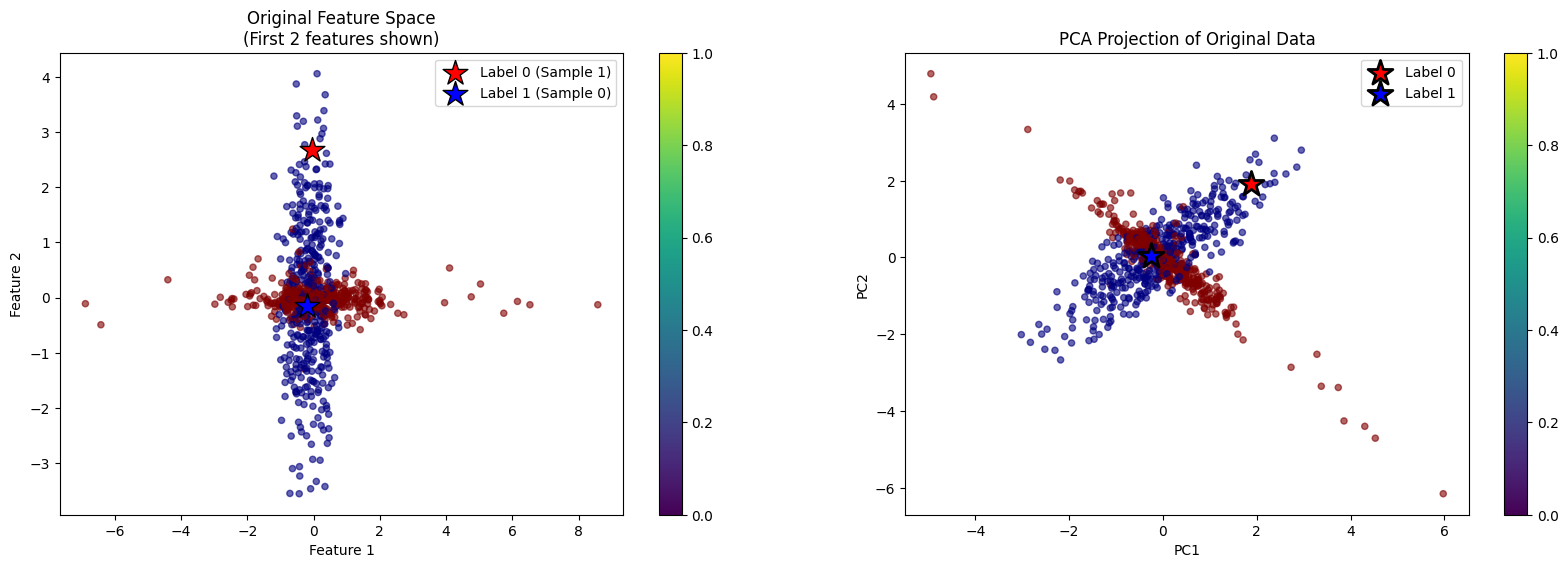

In [ ]:

# Visualize the transformation process with TWO samples
fig = plt.figure(figsize=(20, 6))

# Plot 1: Original samples in feature space (showing first 2 features)
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='jet', alpha=0.6, s=20)
plt.scatter(sample_0_original[0, 0], sample_0_original[0, 1], c='red', s=350, marker='*', edgecolors='black', linewidth=1, label=f'Label 0 (Sample {sample_0_index})')
plt.scatter(sample_1_original[0, 0], sample_1_original[0, 1], c='blue', s=350, marker='*', edgecolors='black', linewidth=1, label=f'Label 1 (Sample {sample_1_index})')
plt.title('Original Feature Space\n(First 2 features shown)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar()

# Plot 2: Samples highlighted in original high-dimensional space (using PCA for 2D projection)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
sample_0_pca = pca.transform(sample_0_original)
sample_1_pca = pca.transform(sample_1_original)

plt.subplot(1, 2, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='jet', alpha=0.6, s=20)
plt.scatter(sample_0_pca[0, 0], sample_0_pca[0, 1], c='red', s=350, marker='*', edgecolors='black', linewidth=2, label=f'Label 0')
plt.scatter(sample_1_pca[0, 0], sample_1_pca[0, 1], c='blue', s=350, marker='*', edgecolors='black', linewidth=2, label=f'Label 1')
plt.title('PCA Projection of Original Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.colorbar()

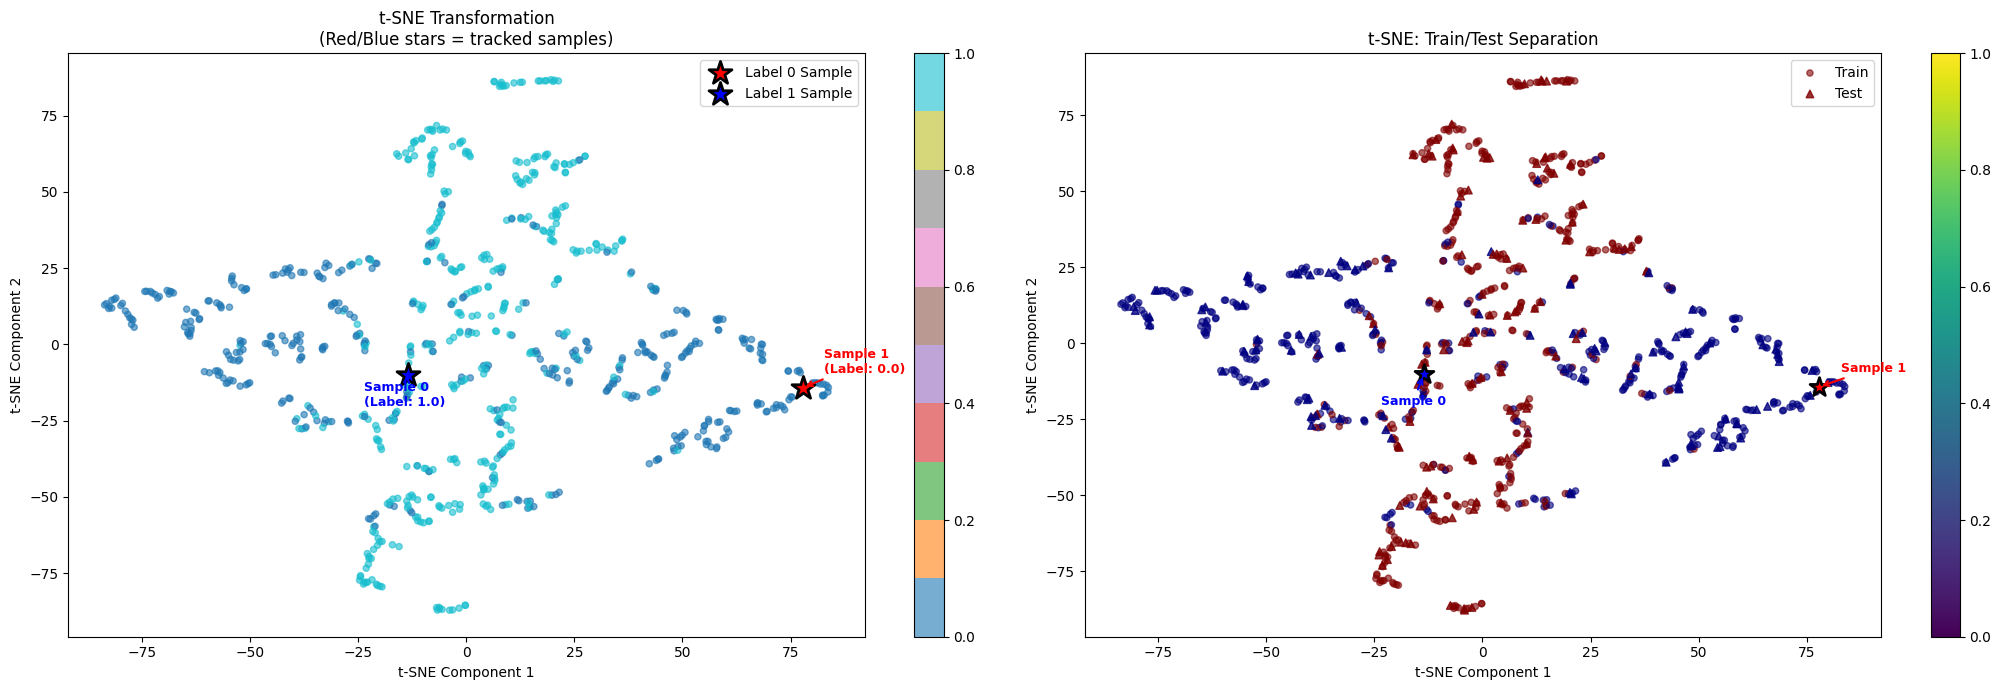

In [ ]:

# Visualize the transformation process with TWO samples
fig = plt.figure(figsize=(21, 7))

# Plot 3: t-SNE transformation with BOTH tracked samples
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_train_tsne_final[:, 0], X_train_tsne_final[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=20)
plt.scatter(sample_0_tsne_coords[0], sample_0_tsne_coords[1], c='red', s=300, marker='*', edgecolors='black', linewidth=2, label=f'Label 0 Sample')
plt.scatter(sample_1_tsne_coords[0], sample_1_tsne_coords[1], c='blue', s=300, marker='*', edgecolors='black', linewidth=2, label=f'Label 1 Sample')

# Add annotations for both samples
plt.annotate(f'Sample {sample_0_index}\n(Label: {sample_0_label})',
             xy=(sample_0_tsne_coords[0], sample_0_tsne_coords[1]),
             xytext=(sample_0_tsne_coords[0]+5, sample_0_tsne_coords[1]+5),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=9, color='red', weight='bold')

plt.annotate(f'Sample {sample_1_index}\n(Label: {sample_1_label})',
             xy=(sample_1_tsne_coords[0], sample_1_tsne_coords[1]),
             xytext=(sample_1_tsne_coords[0]-10, sample_1_tsne_coords[1]-10),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=9, color='blue', weight='bold')

plt.title('t-SNE Transformation\n(Red/Blue stars = tracked samples)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.colorbar(scatter)

# Plot 4: t-SNE with train/test separation and BOTH samples
plt.subplot(1, 2, 2)
# Plot training data
plt.scatter(X_train_tsne_final[:, 0], X_train_tsne_final[:, 1], c=y_train, cmap='jet', alpha=0.6, s=20, label='Train')
# Plot test data
plt.scatter(X_test_tsne_final[:, 0], X_test_tsne_final[:, 1], c=y_test, cmap='jet', alpha=0.8, s=30, marker='^', label='Test')
# Highlight both tracked samples
plt.scatter(sample_0_tsne_coords[0], sample_0_tsne_coords[1], c='red', s=200, marker='*', edgecolors='black', linewidth=2)
plt.scatter(sample_1_tsne_coords[0], sample_1_tsne_coords[1], c='blue', s=200, marker='*', edgecolors='black', linewidth=2)

plt.annotate(f'Sample {sample_0_index}',
             xy=(sample_0_tsne_coords[0], sample_0_tsne_coords[1]),
             xytext=(sample_0_tsne_coords[0]+5, sample_0_tsne_coords[1]+5),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=9, color='red', weight='bold')

plt.annotate(f'Sample {sample_1_index}',
             xy=(sample_1_tsne_coords[0], sample_1_tsne_coords[1]),
             xytext=(sample_1_tsne_coords[0]-10, sample_1_tsne_coords[1]-10),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=9, color='blue', weight='bold')

plt.title('t-SNE: Train/Test Separation')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.colorbar()

plt.tight_layout()
plt.show()

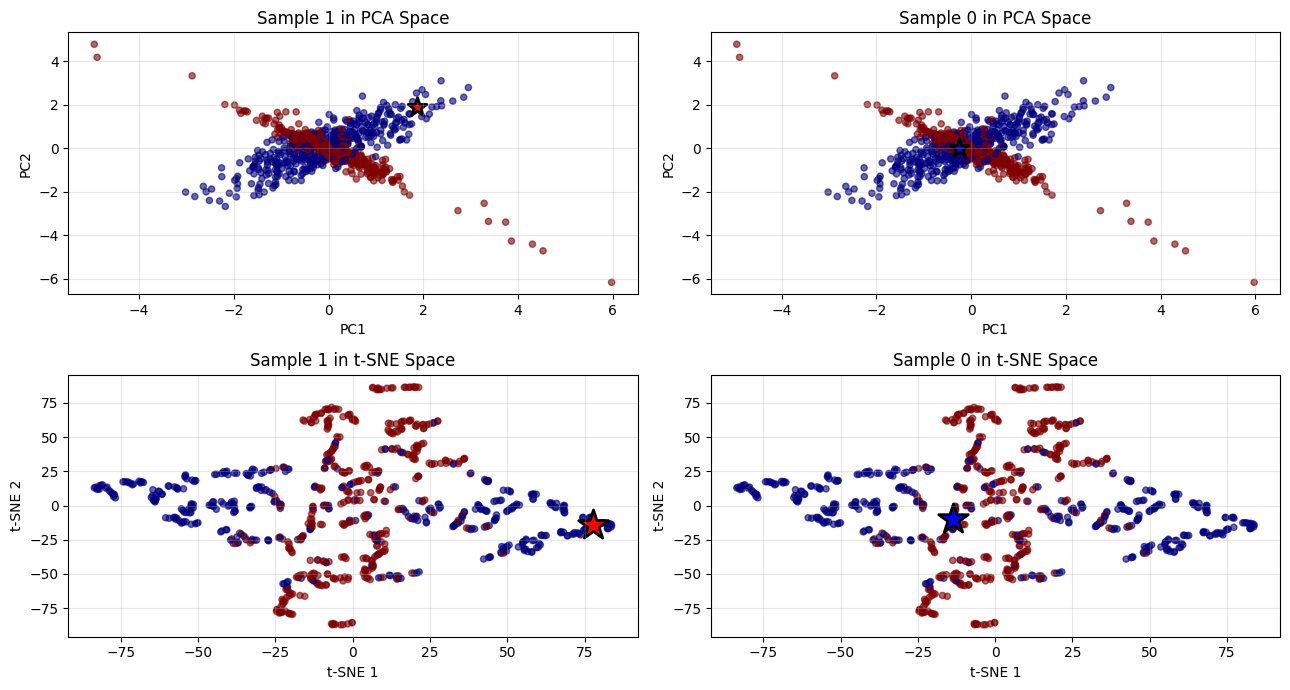


Sample Transformation Summary:
Sample 1 - Label: 0.0
  Predicted label: 0.0
  t-SNE coordinates: (77.84, -14.24)

Sample 0 - Label: 1.0
  Predicted label: 1.0
  t-SNE coordinates: (-13.54, -10.18)


In [ ]:

# Additional visualization: Show both samples' journeys
fig, axes = plt.subplots(2, 2, figsize=(13, 7))


# PCA projections
axes[0, 0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='jet', alpha=0.6, s=20)
axes[0, 0].scatter(sample_0_pca[0, 0], sample_0_pca[0, 1], c='red', s=200, marker='*', edgecolors='black', linewidth=2)
axes[0, 0].set_title(f'Sample {sample_0_index} in PCA Space')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='jet', alpha=0.6, s=20)
axes[0, 1].scatter(sample_1_pca[0, 0], sample_1_pca[0, 1], c='blue', s=200, marker='*', edgecolors='black', linewidth=2)
axes[0, 1].set_title(f'Sample {sample_1_index} in PCA Space')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')
axes[0, 1].grid(True, alpha=0.3)

# t-SNE projections
axes[1, 0].scatter(X_train_tsne_final[:, 0], X_train_tsne_final[:, 1], c=y_train, cmap='jet', alpha=0.6, s=20)
axes[1, 0].scatter(sample_0_tsne_coords[0], sample_0_tsne_coords[1], c='red', s=500, marker='*', edgecolors='black', linewidth=2)
axes[1, 0].set_title(f'Sample {sample_0_index} in t-SNE Space')
axes[1, 0].set_xlabel('t-SNE 1')
axes[1, 0].set_ylabel('t-SNE 2')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(X_train_tsne_final[:, 0], X_train_tsne_final[:, 1], c=y_train, cmap='jet', alpha=0.6, s=20)
axes[1, 1].scatter(sample_1_tsne_coords[0], sample_1_tsne_coords[1], c='blue', s=500, marker='*', edgecolors='black', linewidth=2)
axes[1, 1].set_title(f'Sample {sample_1_index} in t-SNE Space')
axes[1, 1].set_xlabel('t-SNE 1')
axes[1, 1].set_ylabel('t-SNE 2')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSample Transformation Summary:")
print(f"Sample {sample_0_index} - Label: {sample_0_label}")
print(f"  Predicted label: {y_pred[sample_0_index]}")
print(f"  t-SNE coordinates: ({sample_0_tsne_coords[0]:.2f}, {sample_0_tsne_coords[1]:.2f})")
print()
print(f"Sample {sample_1_index} - Label: {sample_1_label}")
print(f"  Predicted label: {y_pred[sample_1_index]}")
print(f"  t-SNE coordinates: ({sample_1_tsne_coords[0]:.2f}, {sample_1_tsne_coords[1]:.2f})")

In [ ]:
# Compare with direct classification
print("\nComparison with direct SVM classification:")
direct_classifier = SVC(kernel='poly', random_state=42)
direct_classifier.fit(X_train_scaled, y_train)
y_pred_direct = direct_classifier.predict(X_test_scaled)
direct_accuracy = accuracy_score(y_test, y_pred_direct)
print(f"Direct SVM Accuracy: {direct_accuracy:.4f}")
print(f"t-SNE + SVM Accuracy: {accuracy:.4f}")


Comparison with direct SVM classification:
Direct SVM Accuracy: 0.5400
t-SNE + SVM Accuracy: 0.8850
